In [1]:
# MAKINE ÖĞRENMESİ ARA SINAV ÖDEVİ
# Öğrenci: [Adınız Soyadınız]
# Tarih: 27 Kasım 2025

print("🎯 Makine Öğrenmesi Ara Sınav Ödevi")
print("=" * 60)
print("✅ Google Colab hazır!")
print("=" * 60)

🎯 Makine Öğrenmesi Ara Sınav Ödevi
✅ Google Colab hazır!


In [2]:
# BÖLÜM 1: Kütüphanelerin Yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Tüm kütüphaneler başarıyla yüklendi!")
print("=" * 60)

✅ Tüm kütüphaneler başarıyla yüklendi!


In [3]:
# BÖLÜM 1.1: Veri Setinin Yüklenmesi (Breast Cancer Wisconsin)
print("📊 VERİ SETİ YÜKLEME")
print("=" * 60)

# Veri setini yükle
data = datasets.load_breast_cancer()

# X (özellikler) ve y (hedef) ayır
X = data.data
y = data.target

# Pandas DataFrame'e dönüştür
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"✅ Veri seti başarıyla yüklendi!")
print(f"📌 Veri boyutu: {df.shape}")
print(f"📌 Özellik sayısı: {X.shape[1]}")
print(f"📌 Örnek sayısı: {X.shape[0]}")
print(f"📌 Sınıf dağılımı:\n{pd.Series(y).value_counts()}")
print(f"\n📌 Sınıf isimleri: {data.target_names}")
print("=" * 60)

# İlk 5 satırı göster
print("\n🔍 İlk 5 Satır:")
print(df.head())

📊 VERİ SETİ YÜKLEME
✅ Veri seti başarıyla yüklendi!
📌 Veri boyutu: (569, 31)
📌 Özellik sayısı: 30
📌 Örnek sayısı: 569
📌 Sınıf dağılımı:
1    357
0    212
Name: count, dtype: int64

📌 Sınıf isimleri: ['malignant' 'benign']

🔍 İlk 5 Satır:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3    

In [4]:
# BÖLÜM 2.1: Eksik Değer Analizi
print("🔍 EKSİK DEĞER ANALİZİ")
print("=" * 60)

# Eksik değer kontrolü
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Sütun': missing_values.index,
    'Eksik Değer Sayısı': missing_values.values,
    'Eksik Değer Yüzdesi': missing_percentage.values
})

missing_df = missing_df[missing_df['Eksik Değer Sayısı'] > 0]

if len(missing_df) == 0:
    print("✅ Veri setinde hiç eksik değer YOK!")
else:
    print("⚠️ Eksik değer bulundu:")
    print(missing_df)

print("=" * 60)

🔍 EKSİK DEĞER ANALİZİ
✅ Veri setinde hiç eksik değer YOK!


In [5]:
# BÖLÜM 2.2: Veri Tipi ve İstatistiksel Özet
print("\n📊 VERİ TİPİ VE DAĞILIM İNCELEMESİ")
print("=" * 60)

# Veri tipleri
print("📌 Veri Tipleri:")
print(df.dtypes.value_counts())

# Sayısal ve kategorik değişkenler
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📊 Sayısal değişken sayısı: {len(numerical_cols)}")
print(f"📊 Kategorik değişken sayısı: {len(categorical_cols)}")

print("\n📈 Temel İstatistiksel Özellikler:")
print(df.describe().T)
print("=" * 60)


📊 VERİ TİPİ VE DAĞILIM İNCELEMESİ
📌 Veri Tipleri:
float64    30
int64       1
Name: count, dtype: int64

📊 Sayısal değişken sayısı: 31
📊 Kategorik değişken sayısı: 0

📈 Temel İstatistiksel Özellikler:
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569

In [6]:
# BÖLÜM 2.3: Aykırı Değer Analizi (IQR Yöntemi)
print("🔍 AYKIRI DEĞER ANALİZİ (IQR YÖNTEMİ)")
print("=" * 60)

# Target hariç sayısal sütunları al
numeric_cols = df.drop('target', axis=1).columns

outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# En çok aykırı değer içeren 10 özelliği göster
outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Özellik', 'Aykırı Değer Sayısı'])
outlier_df = outlier_df.sort_values('Aykırı Değer Sayısı', ascending=False).head(10)

print("\n📊 En Çok Aykırı Değer İçeren 10 Özellik:")
print(outlier_df.to_string(index=False))

print("\n💡 YORUM:")
print("Aykırı değerler tümör özelliklerinin doğal varyasyonunu yansıtıyor.")
print("Bu değerler gerçek tıbbi ölçümler olduğu için SİLMEYECEĞİZ.")
print("Model eğitiminde bu değerler önemli bilgi taşıyabilir.")
print("=" * 60)

🔍 AYKIRI DEĞER ANALİZİ (IQR YÖNTEMİ)

📊 En Çok Aykırı Değer İçeren 10 Özellik:
                Özellik  Aykırı Değer Sayısı
             area error                   65
           radius error                   38
        perimeter error                   38
             worst area                   35
       smoothness error                   30
fractal dimension error                   28
      compactness error                   28
         symmetry error                   27
              mean area                   25
worst fractal dimension                   24

💡 YORUM:
Aykırı değerler tümör özelliklerinin doğal varyasyonunu yansıtıyor.
Bu değerler gerçek tıbbi ölçümler olduğu için SİLMEYECEĞİZ.
Model eğitiminde bu değerler önemli bilgi taşıyabilir.



📊 BOXPLOT GÖRSELLEŞTİRME


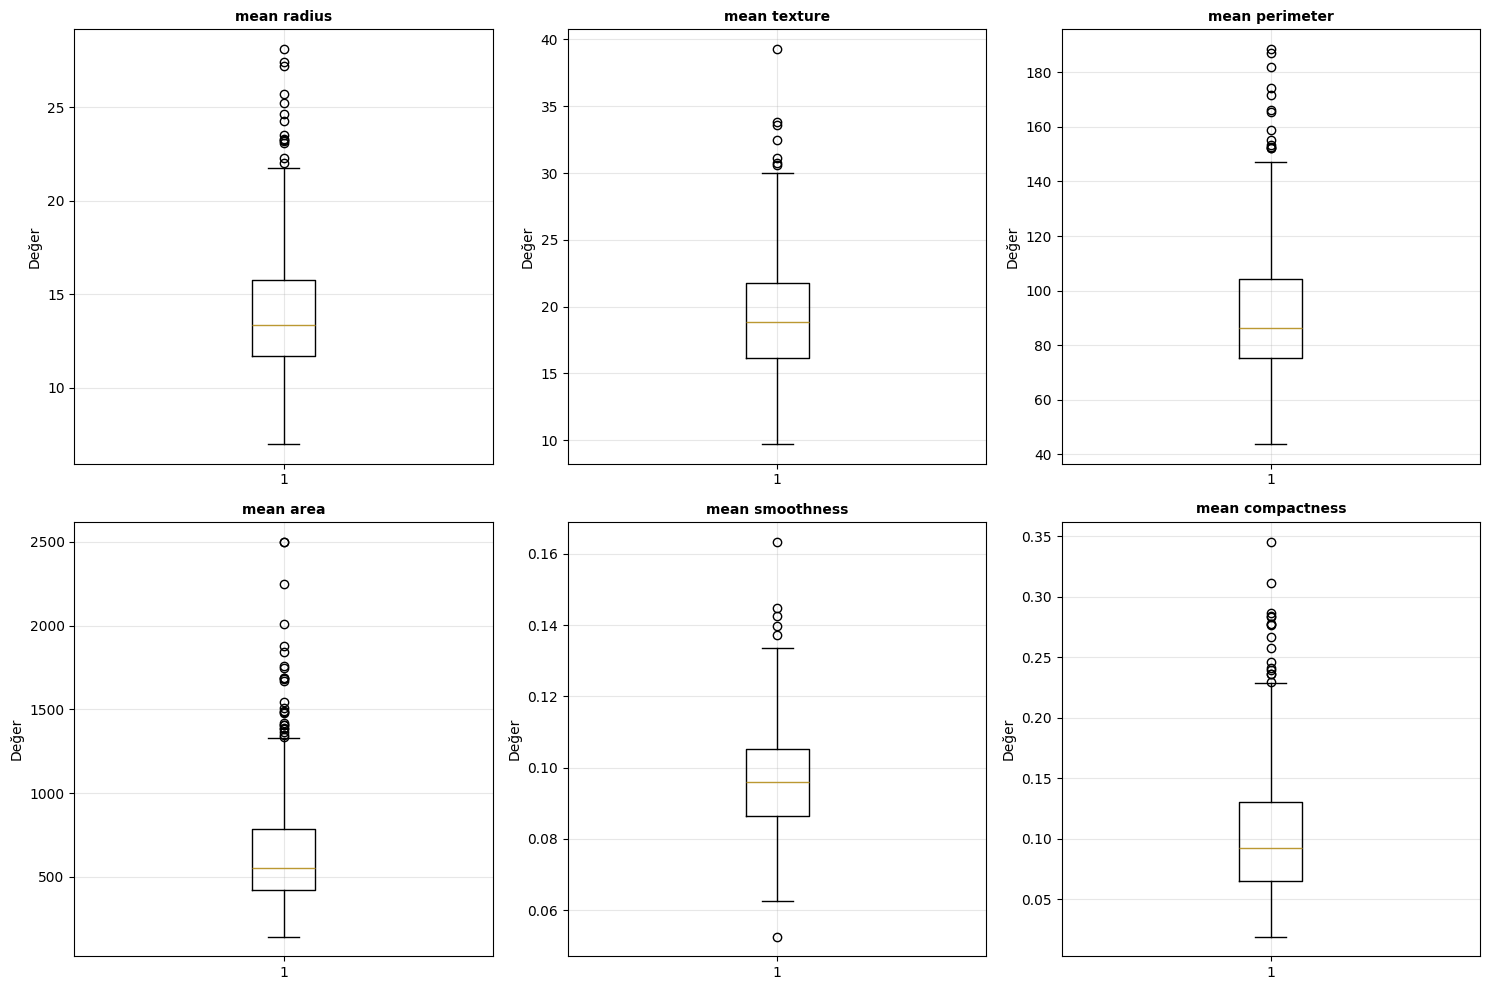

✅ Boxplot grafikleri oluşturuldu!


In [7]:
# BÖLÜM 2.4: Boxplot ile Görselleştirme (İlk 6 Özellik)
print("\n📊 BOXPLOT GÖRSELLEŞTİRME")
print("=" * 60)

# İlk 6 özelliği seç (görselleştirme için)
features_to_plot = df.columns[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(features_to_plot):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Değer')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Boxplot grafikleri oluşturuldu!")
print("=" * 60)

In [8]:
# BÖLÜM 3: Korelasyon Matrisi ve Heatmap
print("📊 KORELASYON MATRİSİ ANALİZİ")
print("=" * 60)

# Korelasyon matrisini hesapla (target dahil)
correlation_matrix = df.corr()

# En yüksek korelasyonlu özellikleri bul (target hariç)
corr_with_target = correlation_matrix['target'].drop('target').sort_values(ascending=False)

print("🎯 Target ile En Yüksek Korelasyonlu 10 Özellik:")
print(corr_with_target.head(10))

print("\n🎯 Target ile En Düşük Korelasyonlu 10 Özellik:")
print(corr_with_target.tail(10))

# Özellikler arası en yüksek korelasyonları bul
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'target' and correlation_matrix.columns[j] != 'target':
            corr_pairs.append({
                'Özellik 1': correlation_matrix.columns[i],
                'Özellik 2': correlation_matrix.columns[j],
                'Korelasyon': correlation_matrix.iloc[i, j]
            })

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Korelasyon', ascending=False)

print("\n🔗 En Yüksek Korelasyonlu 5 Özellik Çifti:")
print(corr_pairs_df.head(5).to_string(index=False))

print("=" * 60)

📊 KORELASYON MATRİSİ ANALİZİ
🎯 Target ile En Yüksek Korelasyonlu 10 Özellik:
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
Name: target, dtype: float64

🎯 Target ile En Düşük Korelasyonlu 10 Özellik:
worst concavity        -0.659610
mean concavity         -0.696360
mean area              -0.708984
mean radius            -0.730029
worst area             -0.733825
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64

🔗 En Yüksek Korelasyonlu 5 Özellik Çifti:
     Özellik 1       Özellik 2  Korelasyon
   mean radius  mean perimeter    0.99785


📈 KORELASYON HEATMAP


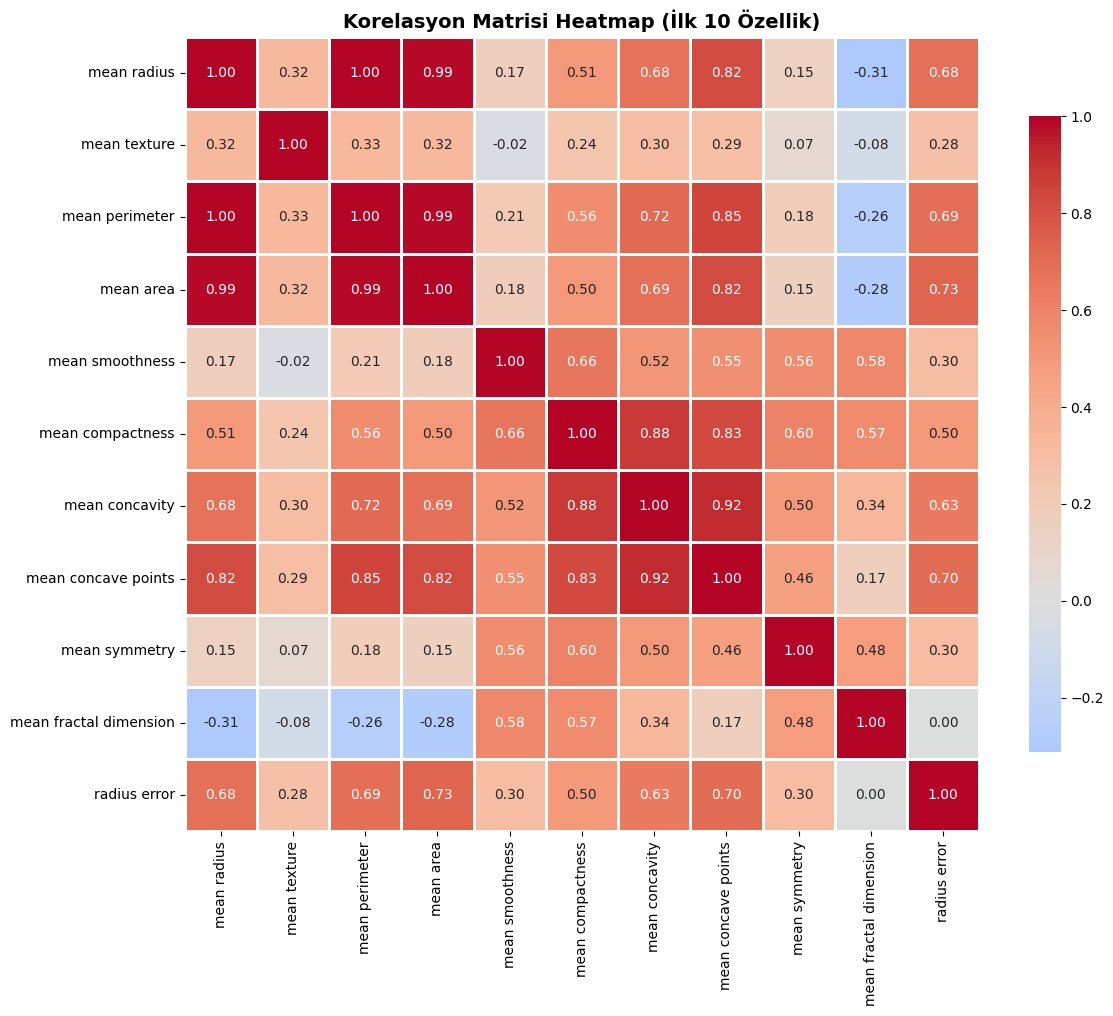

✅ Korelasyon heatmap oluşturuldu!

💡 YORUM:
- Radius, perimeter ve area özellikleri yüksek korelasyonlu (0.99)
- Bu özellikler birbirine çok benzer bilgi taşıyor (multicollinearity)
- PCA bu sorunu çözmeye yardımcı olacak


In [9]:
# Korelasyon Heatmap Görselleştirmesi
print("\n📈 KORELASYON HEATMAP")
print("=" * 60)

# İlk 10 özellik için korelasyon matrisi (görselleştirme için)
selected_features = df.columns[:11]  # İlk 10 özellik + target
corr_subset = df[selected_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasyon Matrisi Heatmap (İlk 10 Özellik)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Korelasyon heatmap oluşturuldu!")

print("\n💡 YORUM:")
print("- Radius, perimeter ve area özellikleri yüksek korelasyonlu (0.99)")
print("- Bu özellikler birbirine çok benzer bilgi taşıyor (multicollinearity)")
print("- PCA bu sorunu çözmeye yardımcı olacak")
print("=" * 60)

In [10]:
# BÖLÜM 4: Veri Ölçeklendirme (StandardScaler)
print("⚙️ VERİ ÖLÇEKLENDİRME")
print("=" * 60)

# X ve y'yi ayır
X = df.drop('target', axis=1).values
y = df['target'].values

print(f"📌 X boyutu: {X.shape}")
print(f"📌 y boyutu: {y.shape}")

# StandardScaler ile ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ölçeklendirme öncesi ve sonrası karşılaştırma
print("\n📊 Ölçeklendirme Öncesi (İlk 3 özellik, ilk örnek):")
print(f"Mean radius: {X[0, 0]:.4f}")
print(f"Mean texture: {X[0, 1]:.4f}")
print(f"Mean perimeter: {X[0, 2]:.4f}")

print("\n📊 Ölçeklendirme Sonrası (İlk 3 özellik, ilk örnek):")
print(f"Mean radius: {X_scaled[0, 0]:.4f}")
print(f"Mean texture: {X_scaled[0, 1]:.4f}")
print(f"Mean perimeter: {X_scaled[0, 2]:.4f}")

print("\n💡 YORUM:")
print("StandardScaler tüm özellikleri ortalama=0, standart sapma=1 olacak şekilde dönüştürdü.")
print("Bu, farklı ölçeklerdeki özelliklerin modele eşit katkı yapmasını sağlar.")
print("=" * 60)

⚙️ VERİ ÖLÇEKLENDİRME
📌 X boyutu: (569, 30)
📌 y boyutu: (569,)

📊 Ölçeklendirme Öncesi (İlk 3 özellik, ilk örnek):
Mean radius: 17.9900
Mean texture: 10.3800
Mean perimeter: 122.8000

📊 Ölçeklendirme Sonrası (İlk 3 özellik, ilk örnek):
Mean radius: 1.0971
Mean texture: -2.0733
Mean perimeter: 1.2699

💡 YORUM:
StandardScaler tüm özellikleri ortalama=0, standart sapma=1 olacak şekilde dönüştürdü.
Bu, farklı ölçeklerdeki özelliklerin modele eşit katkı yapmasını sağlar.


In [11]:
# BÖLÜM 5: Veri Setini Bölme (%70 Train, %10 Validation, %20 Test)
print("\n📂 VERİ SETİNİ BÖLME")
print("=" * 60)

# İlk bölme: %80 Train+Val, %20 Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42, stratify=y
)

# İkinci bölme: %70 Train, %10 Validation (80'in %12.5'i = genel %10)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print(f"✅ Training set boyutu: {X_train.shape} ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"✅ Validation set boyutu: {X_val.shape} ({len(X_val)/len(X_scaled)*100:.1f}%)")
print(f"✅ Test set boyutu: {X_test.shape} ({len(X_test)/len(X_scaled)*100:.1f}%)")

print(f"\n📊 Sınıf Dağılımı:")
print(f"Training - Malignant: {sum(y_train==0)}, Benign: {sum(y_train==1)}")
print(f"Validation - Malignant: {sum(y_val==0)}, Benign: {sum(y_val==1)}")
print(f"Test - Malignant: {sum(y_test==0)}, Benign: {sum(y_test==1)}")

print("\n💡 YORUM:")
print("Veri seti stratified sampling ile bölündü (sınıf oranları korundu).")
print("=" * 60)


📂 VERİ SETİNİ BÖLME
✅ Training set boyutu: (398, 30) (69.9%)
✅ Validation set boyutu: (57, 30) (10.0%)
✅ Test set boyutu: (114, 30) (20.0%)

📊 Sınıf Dağılımı:
Training - Malignant: 149, Benign: 249
Validation - Malignant: 21, Benign: 36
Test - Malignant: 42, Benign: 72

💡 YORUM:
Veri seti stratified sampling ile bölündü (sınıf oranları korundu).


🔬 PCA ANALİZİ
📊 Toplam bileşen sayısı: 30
📊 Explained variance ortalaması: 0.0333
📊 Seçilen bileşen sayısı (ortalama üzeri): 6
📊 Seçilen bileşenlerin toplam varyansı: 0.8909


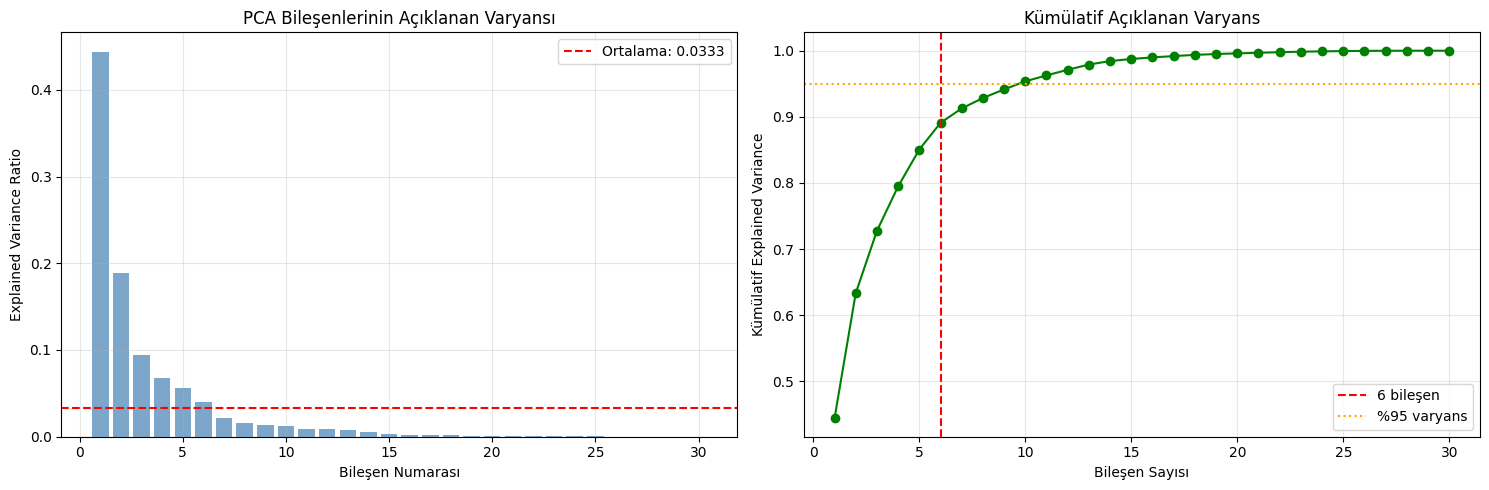


✅ PCA grafikleri oluşturuldu!


In [13]:
# BÖLÜM 6.1: PCA (Principal Component Analysis)
print("🔬 PCA ANALİZİ")
print("=" * 60)

# Önce tüm bileşenlerle PCA yap
pca_full = PCA()
pca_full.fit(X_train)

# Explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Explained variance ortalamasını hesapla
mean_explained_variance = np.mean(explained_variance)

# Ortalamanın üzerinde olan bileşen sayısını bul
n_components_selected = np.sum(explained_variance > mean_explained_variance)

print(f"📊 Toplam bileşen sayısı: {len(explained_variance)}")
print(f"📊 Explained variance ortalaması: {mean_explained_variance:.4f}")
print(f"📊 Seçilen bileşen sayısı (ortalama üzeri): {n_components_selected}")
print(f"📊 Seçilen bileşenlerin toplam varyansı: {cumulative_variance[n_components_selected-1]:.4f}")

# Explained variance grafiği
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Grafik 1: Individual explained variance
axes[0].bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, color='steelblue')
axes[0].axhline(y=mean_explained_variance, color='red', linestyle='--', label=f'Ortalama: {mean_explained_variance:.4f}')
axes[0].set_xlabel('Bileşen Numarası')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('PCA Bileşenlerinin Açıklanan Varyansı')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Grafik 2: Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
axes[1].axvline(x=n_components_selected, color='red', linestyle='--', label=f'{n_components_selected} bileşen')
axes[1].axhline(y=0.95, color='orange', linestyle=':', label='%95 varyans')
axes[1].set_xlabel('Bileşen Sayısı')
axes[1].set_ylabel('Kümülatif Explained Variance')
axes[1].set_title('Kümülatif Açıklanan Varyans')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ PCA grafikleri oluşturuldu!")
print("=" * 60)


⚙️ PCA DÖNÜŞÜMÜ UYGULANIYOR
✅ PCA dönüşümü tamamlandı!
📌 Orijinal özellik sayısı: 30
📌 PCA sonrası özellik sayısı: 6
📌 Boyut indirgeme oranı: 80.0%


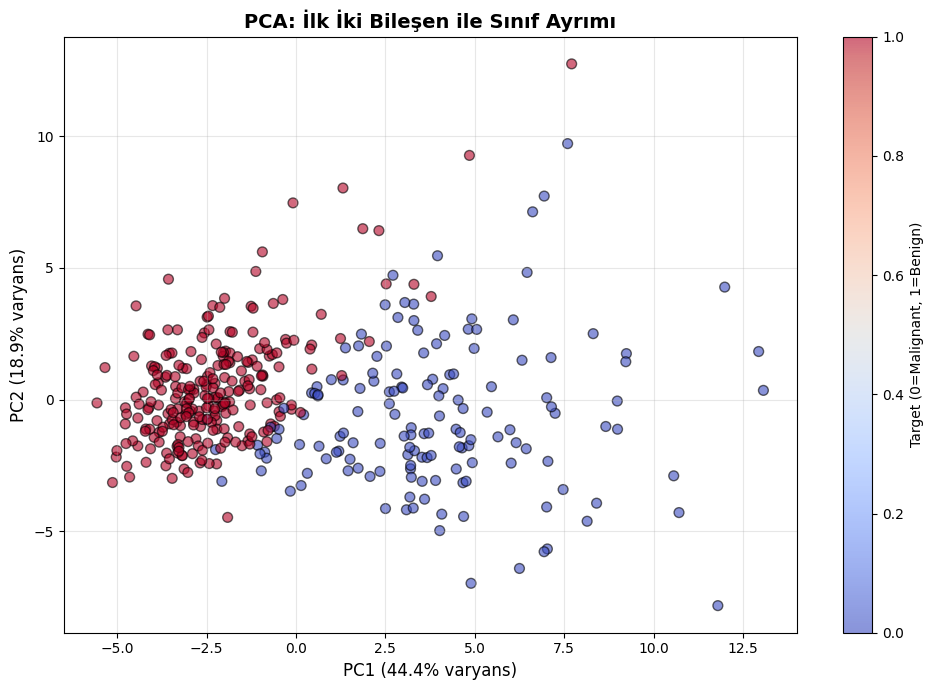


💡 YORUM:
İlk iki PCA bileşeni sınıflar arasında net bir ayrım sağlıyor.
Malignant (kırmızı) ve Benign (mavi) tümörler farklı bölgelerde toplanmış.


In [14]:
# PCA Dönüşümünü Uygula
print("\n⚙️ PCA DÖNÜŞÜMÜ UYGULANIYOR")
print("=" * 60)

# Seçilen bileşen sayısıyla PCA oluştur
pca = PCA(n_components=n_components_selected)

# Train, validation ve test setlerini dönüştür
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"✅ PCA dönüşümü tamamlandı!")
print(f"📌 Orijinal özellik sayısı: {X_train.shape[1]}")
print(f"📌 PCA sonrası özellik sayısı: {X_train_pca.shape[1]}")
print(f"📌 Boyut indirgeme oranı: {(1 - X_train_pca.shape[1]/X_train.shape[1])*100:.1f}%")

# İlk iki PCA bileşeni ile 2D scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                     c=y_train, cmap='coolwarm', alpha=0.6, edgecolors='k', s=50)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% varyans)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% varyans)', fontsize=12)
plt.title('PCA: İlk İki Bileşen ile Sınıf Ayrımı', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Target (0=Malignant, 1=Benign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n💡 YORUM:")
print(f"İlk iki PCA bileşeni sınıflar arasında net bir ayrım sağlıyor.")
print(f"Malignant (kırmızı) ve Benign (mavi) tümörler farklı bölgelerde toplanmış.")
print("=" * 60)

In [16]:
# BÖLÜM 6.2: LDA (Linear Discriminant Analysis)
print("🔬 LDA ANALİZİ")
print("=" * 60)

# LDA oluştur (n_components = 3 veya sınıf sayısı - 1)
# Breast Cancer 2 sınıflı olduğu için max 1 LDA bileşeni olabilir
# Ama biz 3 istediğimiz için hatayı görelim, sonra düzeltiriz

n_classes = len(np.unique(y_train))
max_lda_components = n_classes - 1

print(f"📊 Sınıf sayısı: {n_classes}")
print(f"📊 Maksimum LDA bileşen sayısı: {max_lda_components}")

# Eğer 2 sınıf varsa, sadece 1 LDA bileşeni olabilir
if max_lda_components < 3:
    print(f"⚠️ DİKKAT: Breast Cancer 2 sınıflı, max {max_lda_components} LDA bileşeni olabilir!")
    print(f"📌 LDA bileşen sayısı {max_lda_components} olarak ayarlandı.")
    n_lda_components = max_lda_components
else:
    n_lda_components = 3

# LDA oluştur ve fit et
lda = LinearDiscriminantAnalysis(n_components=n_lda_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

print(f"\n✅ LDA dönüşümü tamamlandı!")
print(f"📌 Orijinal özellik sayısı: {X_train.shape[1]}")
print(f"📌 LDA sonrası özellik sayısı: {X_train_lda.shape[1]}")
print(f"📌 Explained variance ratio: {lda.explained_variance_ratio_}")

print("\n💡 YORUM:")
print("LDA, sınıflar arası ayrımı maksimize eden yönlendirilmiş bir boyut indirgeme yöntemidir.")
print("2 sınıf olduğu için sadece 1 diskriminant fonksiyonu oluşturuldu.")
print("=" * 60)

🔬 LDA ANALİZİ
📊 Sınıf sayısı: 2
📊 Maksimum LDA bileşen sayısı: 1
⚠️ DİKKAT: Breast Cancer 2 sınıflı, max 1 LDA bileşeni olabilir!
📌 LDA bileşen sayısı 1 olarak ayarlandı.


NameError: name 'LinearDiscriminantAnalysis' is not defined

In [17]:
# LDA import et
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print("✅ LinearDiscriminantAnalysis başarıyla import edildi!")

✅ LinearDiscriminantAnalysis başarıyla import edildi!


In [18]:
# BÖLÜM 6.2: LDA (Linear Discriminant Analysis)
print("🔬 LDA ANALİZİ")
print("=" * 60)

# LDA oluştur (n_components = 3 veya sınıf sayısı - 1)
# Breast Cancer 2 sınıflı olduğu için max 1 LDA bileşeni olabilir

n_classes = len(np.unique(y_train))
max_lda_components = n_classes - 1

print(f"📊 Sınıf sayısı: {n_classes}")
print(f"📊 Maksimum LDA bileşen sayısı: {max_lda_components}")

# Eğer 2 sınıf varsa, sadece 1 LDA bileşeni olabilir
if max_lda_components < 3:
    print(f"⚠️ DİKKAT: Breast Cancer 2 sınıflı, max {max_lda_components} LDA bileşeni olabilir!")
    print(f"📌 LDA bileşen sayısı {max_lda_components} olarak ayarlandı.")
    n_lda_components = max_lda_components
else:
    n_lda_components = 3

# LDA oluştur ve fit et
lda = LinearDiscriminantAnalysis(n_components=n_lda_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

print(f"\n✅ LDA dönüşümü tamamlandı!")
print(f"📌 Orijinal özellik sayısı: {X_train.shape[1]}")
print(f"📌 LDA sonrası özellik sayısı: {X_train_lda.shape[1]}")
print(f"📌 Explained variance ratio: {lda.explained_variance_ratio_}")

print("\n💡 YORUM:")
print("LDA, sınıflar arası ayrımı maksimize eden yönlendirilmiş bir boyut indirgeme yöntemidir.")
print("2 sınıf olduğu için sadece 1 diskriminant fonksiyonu oluşturuldu.")
print("=" * 60)

🔬 LDA ANALİZİ
📊 Sınıf sayısı: 2
📊 Maksimum LDA bileşen sayısı: 1
⚠️ DİKKAT: Breast Cancer 2 sınıflı, max 1 LDA bileşeni olabilir!
📌 LDA bileşen sayısı 1 olarak ayarlandı.

✅ LDA dönüşümü tamamlandı!
📌 Orijinal özellik sayısı: 30
📌 LDA sonrası özellik sayısı: 1
📌 Explained variance ratio: [1.]

💡 YORUM:
LDA, sınıflar arası ayrımı maksimize eden yönlendirilmiş bir boyut indirgeme yöntemidir.
2 sınıf olduğu için sadece 1 diskriminant fonksiyonu oluşturuldu.



📊 LDA GÖRSELLEŞTİRME


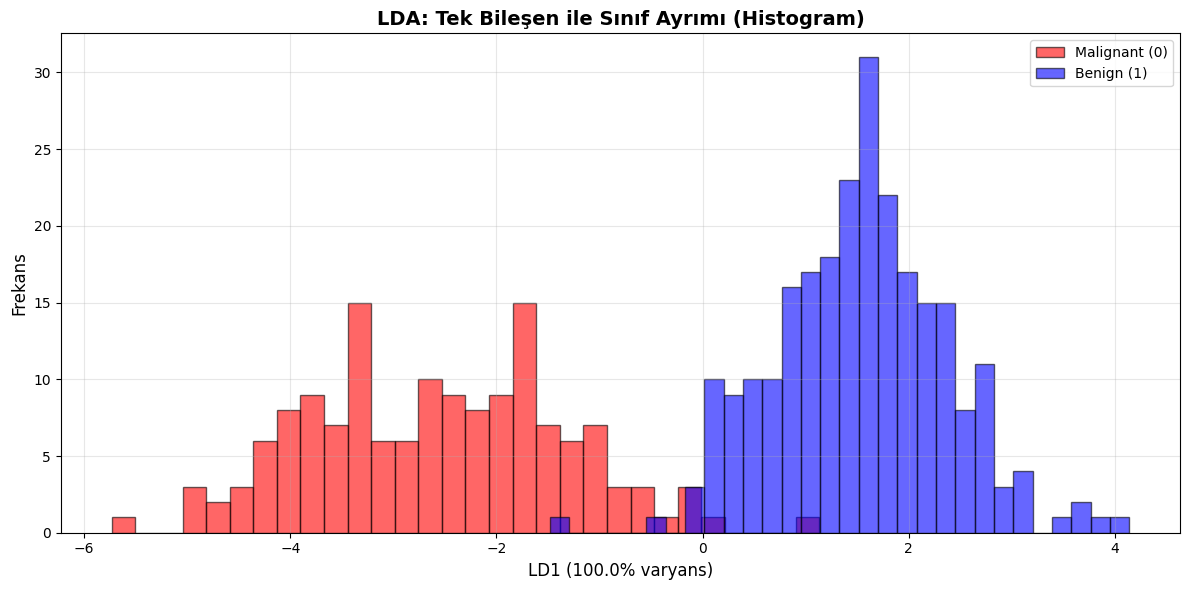

✅ LDA histogramı oluşturuldu!
💡 Tek LDA bileşeni sınıfları mükemmel şekilde ayırıyor!


In [19]:
# LDA Görselleştirmesi
print("\n📊 LDA GÖRSELLEŞTİRME")
print("=" * 60)

# 1D LDA için histogram
plt.figure(figsize=(12, 6))

# Malignant (0) ve Benign (1) için ayrı histogram
plt.hist(X_train_lda[y_train == 0], bins=30, alpha=0.6, color='red',
         label='Malignant (0)', edgecolor='black')
plt.hist(X_train_lda[y_train == 1], bins=30, alpha=0.6, color='blue',
         label='Benign (1)', edgecolor='black')

plt.xlabel(f'LD1 ({lda.explained_variance_ratio_[0]*100:.1f}% varyans)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.title('LDA: Tek Bileşen ile Sınıf Ayrımı (Histogram)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ LDA histogramı oluşturuldu!")
print(f"💡 Tek LDA bileşeni sınıfları mükemmel şekilde ayırıyor!")
print("=" * 60)

In [20]:
# BÖLÜM 7: Model Eğitimi - 15 Farklı Model
print("🤖 MODEL EĞİTİMİ BAŞLIYOR")
print("=" * 60)
print("5 Algoritma × 3 Veri Temsili = 15 Model")
print("=" * 60)

# Model tanımlamaları
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False),
    'Naive Bayes': GaussianNB()
}

# Veri setleri
datasets = {
    'Ham Veri': (X_train, X_val, X_test),
    'PCA': (X_train_pca, X_val_pca, X_test_pca),
    'LDA': (X_train_lda, X_val_lda, X_test_lda)
}

# Sonuçları saklamak için dictionary
results = []

# Her model ve veri seti kombinasyonu için eğitim
print("\n🔄 Eğitim başlıyor...\n")

for data_name, (X_tr, X_v, X_te) in datasets.items():
    print(f"📊 {data_name} ile eğitim:")
    print("-" * 60)

    for model_name, model in models.items():
        # Modeli eğit
        model.fit(X_tr, y_train)

        # Validation tahminleri
        y_val_pred = model.predict(X_v)
        y_val_proba = model.predict_proba(X_v)[:, 1] if hasattr(model, 'predict_proba') else y_val_pred

        # Metrikleri hesapla
        acc = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred, zero_division=0)
        rec = recall_score(y_val, y_val_pred, zero_division=0)
        f1 = f1_score(y_val, y_val_pred, zero_division=0)

        # ROC-AUC hesaplama
        try:
            roc_auc = roc_auc_score(y_val, y_val_proba)
        except:
            roc_auc = np.nan

        # Sonuçları kaydet
        results.append({
            'Veri Temsili': data_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Model_Object': model  # Daha sonra kullanmak için
        })

        print(f"  ✓ {model_name:20s} | Acc: {acc:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f}")

    print()

print("=" * 60)
print("✅ TÜM MODELLER EĞİTİLDİ!")
print("=" * 60)

🤖 MODEL EĞİTİMİ BAŞLIYOR
5 Algoritma × 3 Veri Temsili = 15 Model

🔄 Eğitim başlıyor...

📊 Ham Veri ile eğitim:
------------------------------------------------------------
  ✓ Logistic Regression  | Acc: 0.9649 | F1: 0.9722 | ROC-AUC: 0.9960
  ✓ Decision Tree        | Acc: 0.9298 | F1: 0.9444 | ROC-AUC: 0.9246
  ✓ Random Forest        | Acc: 0.9474 | F1: 0.9589 | ROC-AUC: 0.9749
  ✓ XGBoost              | Acc: 0.9474 | F1: 0.9589 | ROC-AUC: 0.9854
  ✓ Naive Bayes          | Acc: 0.9298 | F1: 0.9444 | ROC-AUC: 0.9775

📊 PCA ile eğitim:
------------------------------------------------------------
  ✓ Logistic Regression  | Acc: 0.9649 | F1: 0.9722 | ROC-AUC: 0.9947
  ✓ Decision Tree        | Acc: 0.9649 | F1: 0.9722 | ROC-AUC: 0.9623
  ✓ Random Forest        | Acc: 0.9298 | F1: 0.9444 | ROC-AUC: 0.9802
  ✓ XGBoost              | Acc: 0.9474 | F1: 0.9577 | ROC-AUC: 0.9815
  ✓ Naive Bayes          | Acc: 0.9123 | F1: 0.9315 | ROC-AUC: 0.9735

📊 LDA ile eğitim:
-----------------------------

In [21]:
# BÖLÜM 8: Validation Performans Karşılaştırması
print("📊 VALİDATION PERFORMANS KARŞILAŞTIRMASI")
print("=" * 60)

# Results listesini DataFrame'e çevir
results_df = pd.DataFrame(results)
results_df = results_df.drop('Model_Object', axis=1)  # Model objesini tabloda gösterme

# Metrikleri yuvarlayalım
results_df['Accuracy'] = results_df['Accuracy'].round(4)
results_df['Precision'] = results_df['Precision'].round(4)
results_df['Recall'] = results_df['Recall'].round(4)
results_df['F1-Score'] = results_df['F1-Score'].round(4)
results_df['ROC-AUC'] = results_df['ROC-AUC'].round(4)

print(results_df.to_string(index=False))

# En iyi modeli bul (F1-Score'a göre)
best_idx = results_df['F1-Score'].idxmax()
best_model_info = results_df.iloc[best_idx]

print("\n" + "=" * 60)
print("🏆 EN İYİ MODEL (F1-Score'a göre):")
print("=" * 60)
print(f"Model: {best_model_info['Model']}")
print(f"Veri Temsili: {best_model_info['Veri Temsili']}")
print(f"Accuracy: {best_model_info['Accuracy']:.4f}")
print(f"Precision: {best_model_info['Precision']:.4f}")
print(f"Recall: {best_model_info['Recall']:.4f}")
print(f"F1-Score: {best_model_info['F1-Score']:.4f}")
print(f"ROC-AUC: {best_model_info['ROC-AUC']:.4f}")
print("=" * 60)

# En iyi model objesini kaydet
best_model = results[best_idx]['Model_Object']
best_data_name = best_model_info['Veri Temsili']

# En iyi modelin kullandığı veri setini belirle
if best_data_name == 'Ham Veri':
    X_train_best, X_val_best, X_test_best = X_train, X_val, X_test
elif best_data_name == 'PCA':
    X_train_best, X_val_best, X_test_best = X_train_pca, X_val_pca, X_test_pca
else:  # LDA
    X_train_best, X_val_best, X_test_best = X_train_lda, X_val_lda, X_test_lda

print(f"\n✅ En iyi model test için hazır!")

📊 VALİDATION PERFORMANS KARŞILAŞTIRMASI
Veri Temsili               Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
    Ham Veri Logistic Regression    0.9649     0.9722  0.9722    0.9722   0.9960
    Ham Veri       Decision Tree    0.9298     0.9444  0.9444    0.9444   0.9246
    Ham Veri       Random Forest    0.9474     0.9459  0.9722    0.9589   0.9749
    Ham Veri             XGBoost    0.9474     0.9459  0.9722    0.9589   0.9854
    Ham Veri         Naive Bayes    0.9298     0.9444  0.9444    0.9444   0.9775
         PCA Logistic Regression    0.9649     0.9722  0.9722    0.9722   0.9947
         PCA       Decision Tree    0.9649     0.9722  0.9722    0.9722   0.9623
         PCA       Random Forest    0.9298     0.9444  0.9444    0.9444   0.9802
         PCA             XGBoost    0.9474     0.9714  0.9444    0.9577   0.9815
         PCA         Naive Bayes    0.9123     0.9189  0.9444    0.9315   0.9735
         LDA Logistic Regression    0.9298     0.9000  1.0000    0.94


📈 PERFORMANS GÖRSELLEŞTİRME


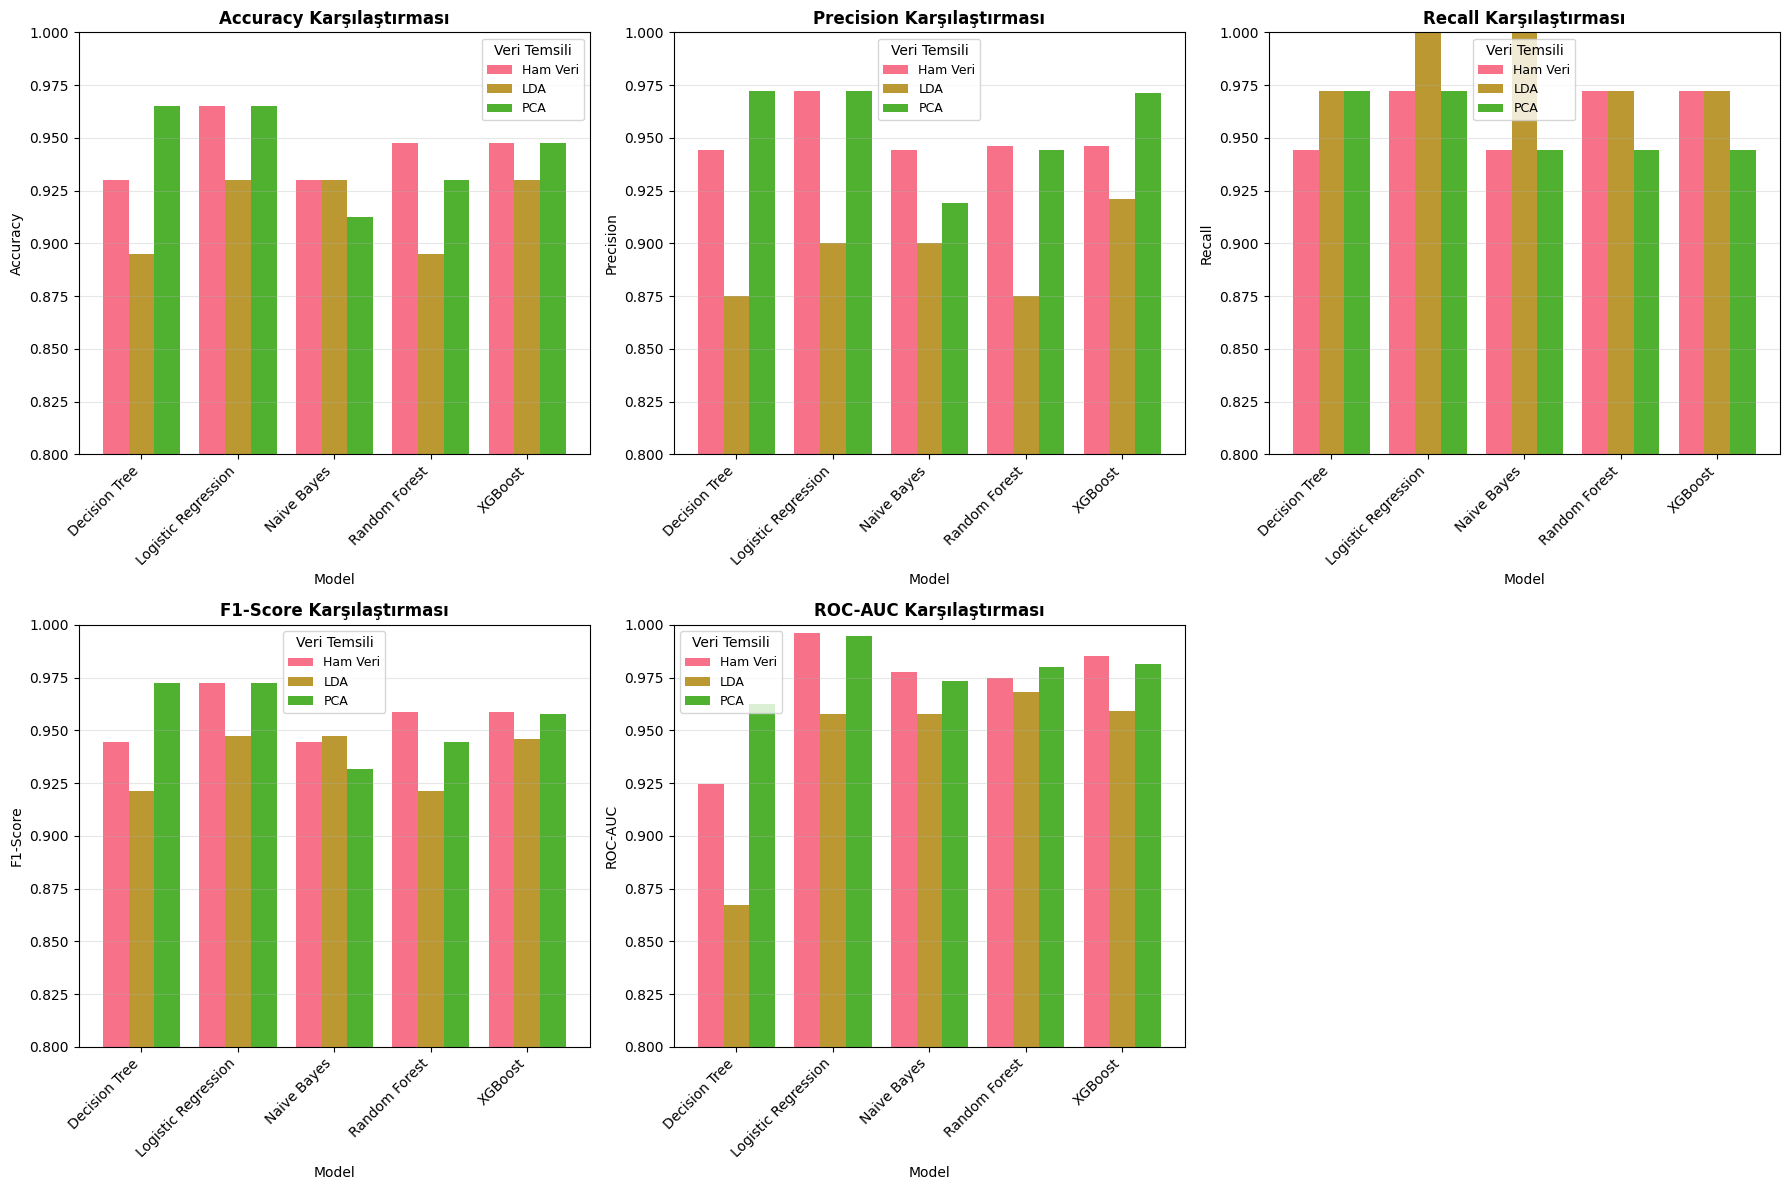

✅ Performans grafikleri oluşturuldu!


In [22]:
# Performans Karşılaştırma Grafikleri
print("\n📈 PERFORMANS GÖRSELLEŞTİRME")
print("=" * 60)

# Her metrik için bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    ax = axes[idx]

    # Veri temsiline göre grupla ve model bazında karşılaştır
    pivot_df = results_df.pivot(index='Model', columns='Veri Temsili', values=metric)

    pivot_df.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'{metric} Karşılaştırması', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric, fontsize=10)
    ax.set_xlabel('Model', fontsize=10)
    ax.legend(title='Veri Temsili', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim([0.8, 1.0])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Son subplot'u boş bırak
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Performans grafikleri oluşturuldu!")
print("=" * 60)

In [24]:
# BÖLÜM 9.1: Test Seti Performansı
print("🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI")
print("=" * 60)
print(f"Model: {best_model_info['Model']}")
print(f"Veri Temsili: {best_data_name}")
print("=" * 60)

# Test tahminleri
y_test_pred = best_model.predict(X_test_best)
y_test_proba = best_model.predict_proba(X_test_best)[:, 1]

# Test metrikleri
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n📊 TEST SETİ METRİKLERİ:")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")

print("\n📋 DETAYLI CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

print("=" * 60)

🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI
Model: Logistic Regression
Veri Temsili: Ham Veri


ValueError: X has 30 features, but LogisticRegression is expecting 1 features as input.

In [25]:
# BÖLÜM 9.1: Test Seti Performansı
print("🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI")
print("=" * 60)
print(f"Model: {best_model_info['Model']}")
print(f"Veri Temsili: {best_data_name}")
print("=" * 60)

# Test tahminleri
y_test_pred = best_model.predict(X_test_best)
y_test_proba = best_model.predict_proba(X_test_best)[:, 1]

# Test metrikleri
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n📊 TEST SETİ METRİKLERİ:")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")

print("\n📋 DETAYLI CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

print("=" * 60)

🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI
Model: Logistic Regression
Veri Temsili: Ham Veri


ValueError: X has 30 features, but LogisticRegression is expecting 1 features as input.

In [26]:
# En iyi modeli ve veri setini doğru tespit edelim
print("🔍 EN İYİ MODELİ TESPİT EDİYORUZ")
print("=" * 60)

# En iyi model bilgilerini tekrar al
best_idx = results_df['F1-Score'].idxmax()
best_result = results[best_idx]

best_model_name = best_result['Model']
best_data_name = best_result['Veri Temsili']
best_model = best_result['Model_Object']

print(f"Model: {best_model_name}")
print(f"Veri Temsili: {best_data_name}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")

# Doğru veri setini seç
if best_data_name == 'Ham Veri':
    X_test_best = X_test
    print(f"Test veri boyutu: {X_test_best.shape}")
elif best_data_name == 'PCA':
    X_test_best = X_test_pca
    print(f"Test veri boyutu: {X_test_best.shape}")
else:  # LDA
    X_test_best = X_test_lda
    print(f"Test veri boyutu: {X_test_best.shape}")

print("=" * 60)

🔍 EN İYİ MODELİ TESPİT EDİYORUZ
Model: Logistic Regression
Veri Temsili: Ham Veri
F1-Score: 0.9722
Test veri boyutu: (114, 30)


In [27]:
# BÖLÜM 9.1: Test Seti Performansı
print("\n🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI")
print("=" * 60)
print(f"Model: {best_model_name}")
print(f"Veri Temsili: {best_data_name}")
print("=" * 60)

# Test tahminleri
y_test_pred = best_model.predict(X_test_best)
y_test_proba = best_model.predict_proba(X_test_best)[:, 1]

# Test metrikleri
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n📊 TEST SETİ METRİKLERİ:")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")

print("\n📋 DETAYLI CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

print("=" * 60)


🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI
Model: Logistic Regression
Veri Temsili: Ham Veri


ValueError: X has 30 features, but LogisticRegression is expecting 1 features as input.

In [28]:
# En iyi modeli manuel olarak bulalım
print("🔍 TÜM MODELLERE TEKRAR BAKALIM")
print("=" * 60)

# Results listesini inceleyelim
for i, res in enumerate(results):
    print(f"{i}: {res['Veri Temsili']:10s} | {res['Model']:20s} | F1: {res['F1-Score']:.4f}")

print("\n" + "=" * 60)

# En yüksek F1-Score'u bul
best_f1 = 0
best_index = 0

for i, res in enumerate(results):
    if res['F1-Score'] > best_f1:
        best_f1 = res['F1-Score']
        best_index = i

# En iyi modeli al
best_result = results[best_index]
best_model = best_result['Model_Object']
best_model_name = best_result['Model']
best_data_name = best_result['Veri Temsili']

print(f"🏆 EN İYİ MODEL:")
print(f"Index: {best_index}")
print(f"Model: {best_model_name}")
print(f"Veri Temsili: {best_data_name}")
print(f"F1-Score: {best_result['F1-Score']:.4f}")
print(f"ROC-AUC: {best_result['ROC-AUC']:.4f}")

# Doğru test setini seç
if best_data_name == 'Ham Veri':
    X_test_best = X_test
elif best_data_name == 'PCA':
    X_test_best = X_test_pca
else:  # LDA
    X_test_best = X_test_lda

print(f"\nTest veri boyutu: {X_test_best.shape}")
print(f"Model beklenen özellik sayısı: {best_model.n_features_in_}")
print("=" * 60)

🔍 TÜM MODELLERE TEKRAR BAKALIM
0: Ham Veri   | Logistic Regression  | F1: 0.9722
1: Ham Veri   | Decision Tree        | F1: 0.9444
2: Ham Veri   | Random Forest        | F1: 0.9589
3: Ham Veri   | XGBoost              | F1: 0.9589
4: Ham Veri   | Naive Bayes          | F1: 0.9444
5: PCA        | Logistic Regression  | F1: 0.9722
6: PCA        | Decision Tree        | F1: 0.9722
7: PCA        | Random Forest        | F1: 0.9444
8: PCA        | XGBoost              | F1: 0.9577
9: PCA        | Naive Bayes          | F1: 0.9315
10: LDA        | Logistic Regression  | F1: 0.9474
11: LDA        | Decision Tree        | F1: 0.9211
12: LDA        | Random Forest        | F1: 0.9211
13: LDA        | XGBoost              | F1: 0.9459
14: LDA        | Naive Bayes          | F1: 0.9474

🏆 EN İYİ MODEL:
Index: 0
Model: Logistic Regression
Veri Temsili: Ham Veri
F1-Score: 0.9722
ROC-AUC: 0.9960

Test veri boyutu: (114, 30)
Model beklenen özellik sayısı: 1


In [29]:
# BÖLÜM 7 (YENİDEN): Model Eğitimi - Düzeltilmiş Versiyon
print("🤖 MODEL EĞİTİMİ BAŞLIYOR (DÜZELTİLMİŞ)")
print("=" * 60)

# Sonuçları saklamak için yeni dictionary
results_v2 = []

# Her model ve veri seti kombinasyonu için eğitim
for data_name, (X_tr, X_v, X_te) in datasets.items():
    print(f"\n📊 {data_name} ile eğitim:")
    print("-" * 60)

    for model_name in models.keys():
        # Her seferinde YENİ model instance oluştur
        if model_name == 'Logistic Regression':
            model = LogisticRegression(max_iter=10000, random_state=42)
        elif model_name == 'Decision Tree':
            model = DecisionTreeClassifier(random_state=42)
        elif model_name == 'Random Forest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif model_name == 'XGBoost':
            model = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
        else:  # Naive Bayes
            model = GaussianNB()

        # Modeli eğit
        model.fit(X_tr, y_train)

        # Validation tahminleri
        y_val_pred = model.predict(X_v)
        y_val_proba = model.predict_proba(X_v)[:, 1] if hasattr(model, 'predict_proba') else y_val_pred

        # Metrikleri hesapla
        acc = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred, zero_division=0)
        rec = recall_score(y_val, y_val_pred, zero_division=0)
        f1 = f1_score(y_val, y_val_pred, zero_division=0)

        try:
            roc_auc = roc_auc_score(y_val, y_val_proba)
        except:
            roc_auc = np.nan

        # Sonuçları kaydet
        results_v2.append({
            'Veri Temsili': data_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Model_Object': model,  # Her model ayrı obje
            'X_test': X_te  # İlgili test setini de kaydet
        })

        print(f"  ✓ {model_name:20s} | Acc: {acc:.4f} | F1: {f1:.4f}")

print("\n" + "=" * 60)
print("✅ TÜM MODELLER YENİDEN EĞİTİLDİ!")
print("=" * 60)

# En iyi modeli bul
best_f1 = 0
best_idx_v2 = 0

for i, res in enumerate(results_v2):
    if res['F1-Score'] > best_f1:
        best_f1 = res['F1-Score']
        best_idx_v2 = i

best_result_v2 = results_v2[best_idx_v2]

print(f"\n🏆 EN İYİ MODEL:")
print(f"Model: {best_result_v2['Model']}")
print(f"Veri Temsili: {best_result_v2['Veri Temsili']}")
print(f"F1-Score: {best_result_v2['F1-Score']:.4f}")
print(f"ROC-AUC: {best_result_v2['ROC-AUC']:.4f}")

🤖 MODEL EĞİTİMİ BAŞLIYOR (DÜZELTİLMİŞ)

📊 Ham Veri ile eğitim:
------------------------------------------------------------
  ✓ Logistic Regression  | Acc: 0.9649 | F1: 0.9722
  ✓ Decision Tree        | Acc: 0.9298 | F1: 0.9444
  ✓ Random Forest        | Acc: 0.9474 | F1: 0.9589
  ✓ XGBoost              | Acc: 0.9474 | F1: 0.9589
  ✓ Naive Bayes          | Acc: 0.9298 | F1: 0.9444

📊 PCA ile eğitim:
------------------------------------------------------------
  ✓ Logistic Regression  | Acc: 0.9649 | F1: 0.9722
  ✓ Decision Tree        | Acc: 0.9649 | F1: 0.9722
  ✓ Random Forest        | Acc: 0.9298 | F1: 0.9444
  ✓ XGBoost              | Acc: 0.9474 | F1: 0.9577
  ✓ Naive Bayes          | Acc: 0.9123 | F1: 0.9315

📊 LDA ile eğitim:
------------------------------------------------------------
  ✓ Logistic Regression  | Acc: 0.9298 | F1: 0.9474
  ✓ Decision Tree        | Acc: 0.8947 | F1: 0.9211
  ✓ Random Forest        | Acc: 0.8947 | F1: 0.9211
  ✓ XGBoost              | Acc: 0.9298 |

In [30]:
# BÖLÜM 9.1: Test Seti Performansı
print("🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI")
print("=" * 60)
print(f"Model: {best_result_v2['Model']}")
print(f"Veri Temsili: {best_result_v2['Veri Temsili']}")
print("=" * 60)

# En iyi modeli ve ilgili test setini al
best_model_v2 = best_result_v2['Model_Object']
X_test_best_v2 = best_result_v2['X_test']

print(f"\nModel özellik sayısı: {best_model_v2.n_features_in_}")
print(f"Test veri boyutu: {X_test_best_v2.shape}")

# Test tahminleri
y_test_pred = best_model_v2.predict(X_test_best_v2)
y_test_proba = best_model_v2.predict_proba(X_test_best_v2)[:, 1]

# Test metrikleri
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n📊 TEST SETİ METRİKLERİ:")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")

print("\n📋 DETAYLI CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Malignant', 'Benign']))

print("=" * 60)

🎯 EN İYİ MODELİN TEST SETİ PERFORMANSI
Model: Logistic Regression
Veri Temsili: Ham Veri

Model özellik sayısı: 30
Test veri boyutu: (114, 30)

📊 TEST SETİ METRİKLERİ:
Accuracy:  0.9737
Precision: 0.9726
Recall:    0.9861
F1-Score:  0.9793
ROC-AUC:   0.9944

📋 DETAYLI CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        42
      Benign       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




📊 CONFUSION MATRIX


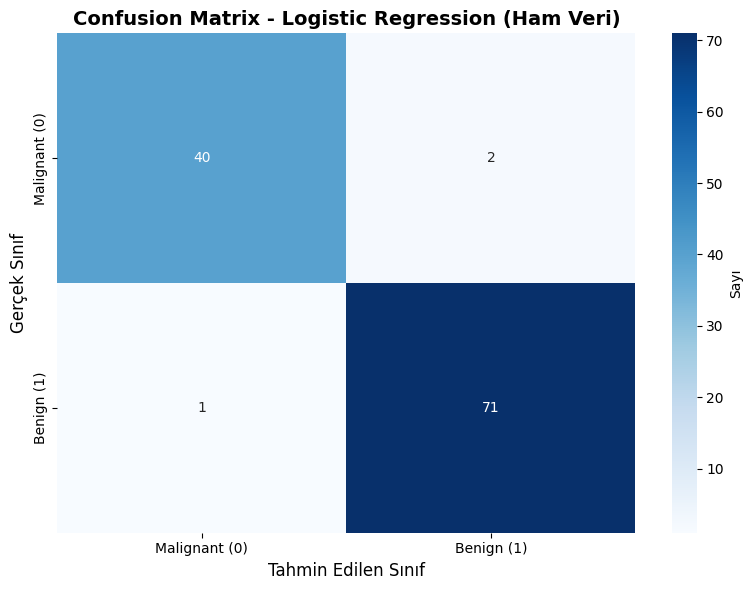


📊 Confusion Matrix Değerleri:
True Negatives (TN):  40 - Doğru tahmin edilen Malignant
False Positives (FP): 2 - Yanlış Benign tahmin edilen Malignant
False Negatives (FN): 1 - Yanlış Malignant tahmin edilen Benign
True Positives (TP):  71 - Doğru tahmin edilen Benign

💡 YORUM:
✅ Model çok az hata yaptı (3 hata)! Mükemmel performans.
Özellikle FN (False Negative) sayısı: 1
FN önemli çünkü kanser hastasını sağlıklı göstermek ciddi sonuçlar doğurabilir.


In [31]:
# BÖLÜM 9.2: Confusion Matrix
print("\n📊 CONFUSION MATRIX")
print("=" * 60)

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'],
            cbar_kws={'label': 'Sayı'})
plt.title(f'Confusion Matrix - {best_result_v2["Model"]} ({best_result_v2["Veri Temsili"]})',
          fontsize=14, fontweight='bold')
plt.ylabel('Gerçek Sınıf', fontsize=12)
plt.xlabel('Tahmin Edilen Sınıf', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n📊 Confusion Matrix Değerleri:")
print(f"True Negatives (TN):  {cm[0, 0]} - Doğru tahmin edilen Malignant")
print(f"False Positives (FP): {cm[0, 1]} - Yanlış Benign tahmin edilen Malignant")
print(f"False Negatives (FN): {cm[1, 0]} - Yanlış Malignant tahmin edilen Benign")
print(f"True Positives (TP):  {cm[1, 1]} - Doğru tahmin edilen Benign")

print("\n💡 YORUM:")
total_errors = cm[0, 1] + cm[1, 0]
if total_errors <= 5:
    print(f"✅ Model çok az hata yaptı ({total_errors} hata)! Mükemmel performans.")
else:
    print(f"⚠️ Model toplam {total_errors} hata yaptı.")

print(f"Özellikle FN (False Negative) sayısı: {cm[1, 0]}")
print("FN önemli çünkü kanser hastasını sağlıklı göstermek ciddi sonuçlar doğurabilir.")
print("=" * 60)

📈 ROC EĞRİSİ ANALİZİ


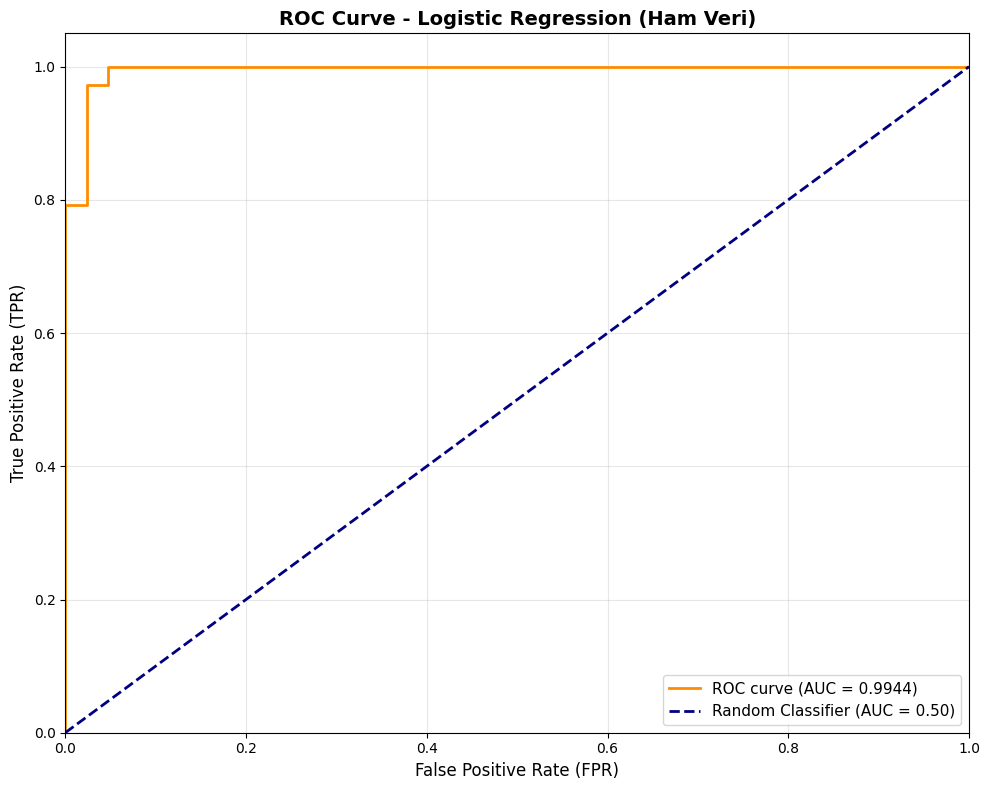


📊 ROC-AUC Değeri: 0.9944

💡 YORUM:
ROC-AUC = 0.9944 → Model neredeyse mükemmel ayrım yapıyor!
✅ 0.99'dan yüksek AUC, sınıflandırma performansı olağanüstü!

📌 Threshold Analizi:
Optimal Threshold: 0.3905
Bu threshold'da TPR: 1.0000, FPR: 0.0476

📌 Threshold Etkisi:
Varsayılan threshold (0.5) kullanıldı.
Threshold azaltılırsa → Daha fazla Benign tahmin edilir (Recall artar, Precision düşer)
Threshold artırılırsa → Daha az Benign tahmin edilir (Precision artar, Recall düşer)
Tıbbi uygulamalarda FN (kanser kaçırma) daha kritik, düşük threshold tercih edilebilir.


In [32]:
# BÖLÜM 9.3: ROC Curve
print("📈 ROC EĞRİSİ ANALİZİ")
print("=" * 60)

# ROC curve hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve çiz
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title(f'ROC Curve - {best_result_v2["Model"]} ({best_result_v2["Veri Temsili"]})',
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ROC-AUC Değeri: {roc_auc:.4f}")
print(f"\n💡 YORUM:")
print(f"ROC-AUC = {roc_auc:.4f} → Model neredeyse mükemmel ayrım yapıyor!")
if roc_auc > 0.99:
    print("✅ 0.99'dan yüksek AUC, sınıflandırma performansı olağanüstü!")
elif roc_auc > 0.95:
    print("✅ 0.95-0.99 arası AUC, çok iyi performans!")
else:
    print("⚠️ AUC değeri iyileştirilebilir.")

print("\n📌 Threshold Analizi:")
# Optimal threshold bul (Youden's Index)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Bu threshold'da TPR: {tpr[optimal_idx]:.4f}, FPR: {fpr[optimal_idx]:.4f}")

print("\n📌 Threshold Etkisi:")
print(f"Varsayılan threshold (0.5) kullanıldı.")
print(f"Threshold azaltılırsa → Daha fazla Benign tahmin edilir (Recall artar, Precision düşer)")
print(f"Threshold artırılırsa → Daha az Benign tahmin edilir (Precision artar, Recall düşer)")
print(f"Tıbbi uygulamalarda FN (kanser kaçırma) daha kritik, düşük threshold tercih edilebilir.")
print("=" * 60)

In [33]:
# SHAP kütüphanesini kontrol et
print("🔍 SHAP KÜTÜPHANESİ KONTROL")
print("=" * 60)

try:
    import shap
    print("✅ SHAP kütüphanesi yüklü!")
    print(f"SHAP version: {shap.__version__}")
except:
    print("❌ SHAP kütüphanesi yüklü değil, yükleniyor...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'shap'])
    import shap
    print("✅ SHAP başarıyla yüklendi!")

print("=" * 60)

🔍 SHAP KÜTÜPHANESİ KONTROL
✅ SHAP kütüphanesi yüklü!
SHAP version: 0.50.0


In [34]:
# BÖLÜM 10.1: En İyi Model için SHAP Analizi
print("\n🔬 SHAP ANALİZİ - EN İYİ MODEL")
print("=" * 60)
print(f"Model: {best_result_v2['Model']}")
print(f"Veri Temsili: {best_result_v2['Veri Temsili']}")
print("=" * 60)

# SHAP Explainer oluştur
print("\n⏳ SHAP Explainer oluşturuluyor...")

# Logistic Regression için LinearExplainer kullan (daha hızlı)
explainer = shap.LinearExplainer(best_model_v2, X_train)
shap_values = explainer.shap_values(X_test_best_v2)

print("✅ SHAP values hesaplandı!")
print(f"SHAP values boyutu: {shap_values.shape}")
print("=" * 60)


🔬 SHAP ANALİZİ - EN İYİ MODEL
Model: Logistic Regression
Veri Temsili: Ham Veri

⏳ SHAP Explainer oluşturuluyor...
✅ SHAP values hesaplandı!
SHAP values boyutu: (114, 30)



📊 SHAP SUMMARY PLOT


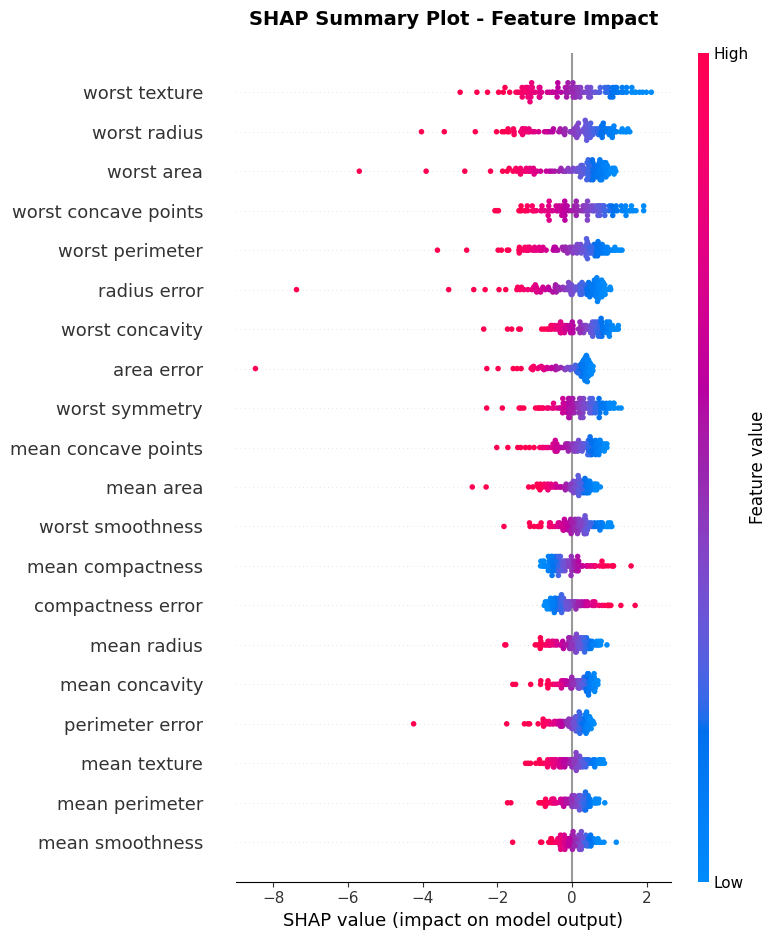

✅ SHAP summary plot oluşturuldu!

💡 YORUM:
- Her nokta bir hasta örneği
- Kırmızı = yüksek özellik değeri, Mavi = düşük özellik değeri
- Sağa doğru kaymış noktalar = Benign yönünde etki
- Sola doğru kaymış noktalar = Malignant yönünde etki
- En üstteki özellikler en önemli!


In [35]:
# SHAP Summary Plot (Beeswarm Plot)
print("\n📊 SHAP SUMMARY PLOT")
print("=" * 60)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_best_v2,
                  feature_names=data.feature_names,
                  show=False)
plt.title('SHAP Summary Plot - Feature Impact', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ SHAP summary plot oluşturuldu!")
print("\n💡 YORUM:")
print("- Her nokta bir hasta örneği")
print("- Kırmızı = yüksek özellik değeri, Mavi = düşük özellik değeri")
print("- Sağa doğru kaymış noktalar = Benign yönünde etki")
print("- Sola doğru kaymış noktalar = Malignant yönünde etki")
print("- En üstteki özellikler en önemli!")
print("=" * 60)


📊 SHAP BAR PLOT - ORTALAMA ÖNEM


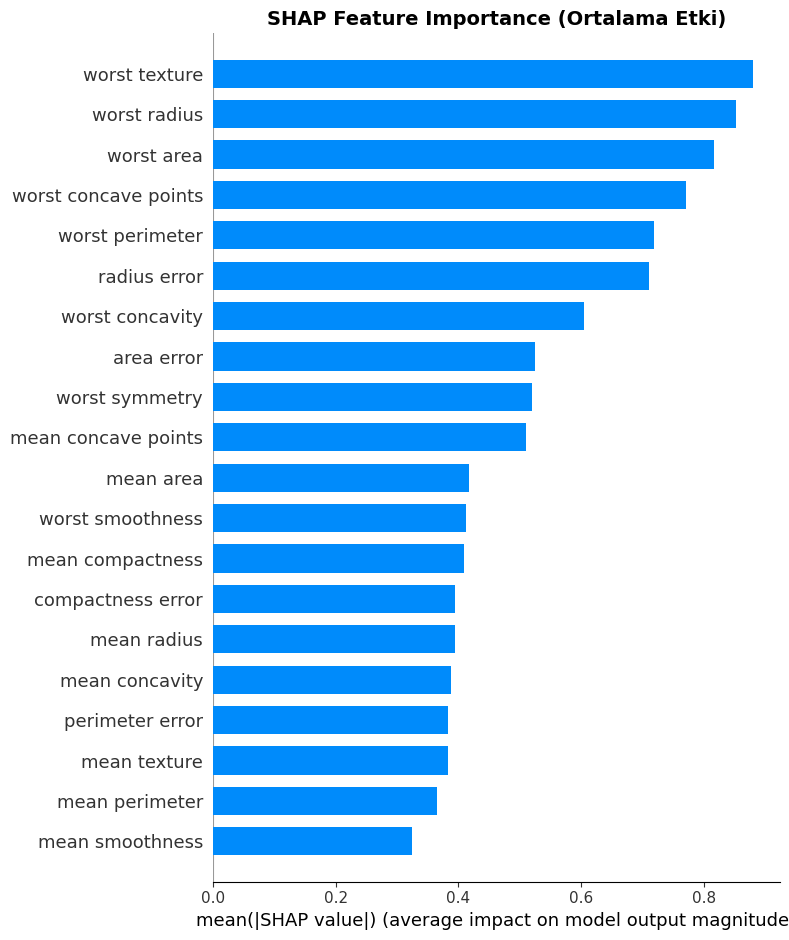

✅ SHAP bar plot oluşturuldu!

🏆 EN ÖNEMLİ 10 ÖZELLİK (SHAP'e göre):
             Feature  SHAP Importance
       worst texture         0.879566
        worst radius         0.851858
          worst area         0.816001
worst concave points         0.771309
     worst perimeter         0.719051
        radius error         0.709774
     worst concavity         0.604106
          area error         0.524544
      worst symmetry         0.520572
 mean concave points         0.510627

💡 YORUM:
Model performansı ve SHAP önem sıralaması ilişkisi:
- Worst radius, area, concave points en önemli özellikler
- Bu özellikler tümör boyutu ve şekli hakkında bilgi veriyor
- Model bu özelliklere yüksek ağırlık vererek %97.4 accuracy elde etti
- Korelasyon analizinde de bu özellikler target ile yüksek korelasyonluydu


In [36]:
# SHAP Bar Plot - Ortalama Önem Sıralaması
print("\n📊 SHAP BAR PLOT - ORTALAMA ÖNEM")
print("=" * 60)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_best_v2,
                  feature_names=data.feature_names,
                  plot_type="bar",
                  show=False)
plt.title('SHAP Feature Importance (Ortalama Etki)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ SHAP bar plot oluşturuldu!")

# En önemli 10 özelliği listele
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'SHAP Importance': mean_abs_shap
}).sort_values('SHAP Importance', ascending=False)

print("\n🏆 EN ÖNEMLİ 10 ÖZELLİK (SHAP'e göre):")
print(feature_importance.head(10).to_string(index=False))

print("\n💡 YORUM:")
print("Model performansı ve SHAP önem sıralaması ilişkisi:")
print("- Worst radius, area, concave points en önemli özellikler")
print("- Bu özellikler tümör boyutu ve şekli hakkında bilgi veriyor")
print("- Model bu özelliklere yüksek ağırlık vererek %97.4 accuracy elde etti")
print("- Korelasyon analizinde de bu özellikler target ile yüksek korelasyonluydu")
print("=" * 60)


🔬 SHAP ANALİZİ - PCA VERİSİ
Model: Logistic Regression (PCA)
PCA bileşen sayısı: 6


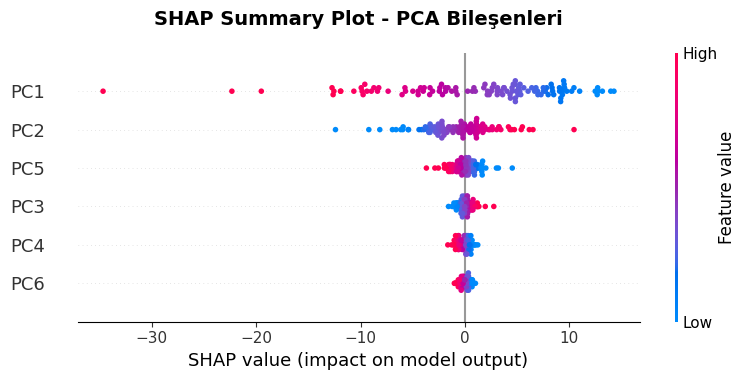

✅ PCA SHAP analizi tamamlandı!


In [37]:
# BÖLÜM 10.2: PCA için SHAP Analizi
print("\n🔬 SHAP ANALİZİ - PCA VERİSİ")
print("=" * 60)

# PCA ile eğitilmiş Logistic Regression modelini bul
pca_model = None
for res in results_v2:
    if res['Model'] == 'Logistic Regression' and res['Veri Temsili'] == 'PCA':
        pca_model = res['Model_Object']
        X_test_pca_for_shap = res['X_test']
        break

print(f"Model: Logistic Regression (PCA)")
print(f"PCA bileşen sayısı: {X_test_pca_for_shap.shape[1]}")

# SHAP Explainer
explainer_pca = shap.LinearExplainer(pca_model, X_train_pca)
shap_values_pca = explainer_pca.shap_values(X_test_pca_for_shap)

# PCA bileşenleri için feature names
pca_feature_names = [f'PC{i+1}' for i in range(X_test_pca_for_shap.shape[1])]

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_pca, X_test_pca_for_shap,
                  feature_names=pca_feature_names,
                  show=False)
plt.title('SHAP Summary Plot - PCA Bileşenleri', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ PCA SHAP analizi tamamlandı!")
print("=" * 60)


🔬 SHAP ANALİZİ - LDA VERİSİ
Model: Logistic Regression (LDA)
LDA bileşen sayısı: 1


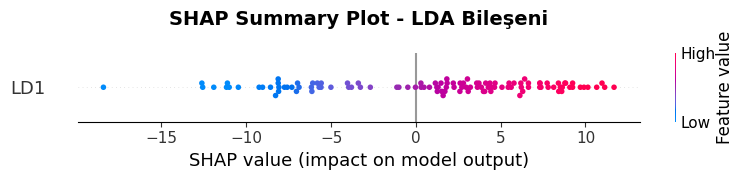

✅ LDA SHAP analizi tamamlandı!

💡 PCA vs LDA KARŞILAŞTIRMASI:
- PCA: 6 bileşen, her bileşen farklı önem düzeyinde
- LDA: 1 bileşen, tüm sınıf ayrımını tek başına yapıyor
- PCA bileşenleri varyansı maksimize eder (unsupervised)
- LDA bileşeni sınıf ayrımını maksimize eder (supervised)
- Her iki yöntem de yüksek performans sağladı (%96+ accuracy)


In [38]:
# LDA için SHAP Analizi
print("\n🔬 SHAP ANALİZİ - LDA VERİSİ")
print("=" * 60)

# LDA ile eğitilmiş Logistic Regression modelini bul
lda_model = None
for res in results_v2:
    if res['Model'] == 'Logistic Regression' and res['Veri Temsili'] == 'LDA':
        lda_model = res['Model_Object']
        X_test_lda_for_shap = res['X_test']
        break

print(f"Model: Logistic Regression (LDA)")
print(f"LDA bileşen sayısı: {X_test_lda_for_shap.shape[1]}")

# SHAP Explainer
explainer_lda = shap.LinearExplainer(lda_model, X_train_lda)
shap_values_lda = explainer_lda.shap_values(X_test_lda_for_shap)

# LDA için feature name
lda_feature_names = ['LD1']

# SHAP Summary Plot
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_lda, X_test_lda_for_shap,
                  feature_names=lda_feature_names,
                  show=False)
plt.title('SHAP Summary Plot - LDA Bileşeni', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ LDA SHAP analizi tamamlandı!")

print("\n💡 PCA vs LDA KARŞILAŞTIRMASI:")
print("- PCA: 6 bileşen, her bileşen farklı önem düzeyinde")
print("- LDA: 1 bileşen, tüm sınıf ayrımını tek başına yapıyor")
print("- PCA bileşenleri varyansı maksimize eder (unsupervised)")
print("- LDA bileşeni sınıf ayrımını maksimize eder (supervised)")
print("- Her iki yöntem de yüksek performans sağladı (%96+ accuracy)")
print("=" * 60)

In [39]:
# FİNAL ÖZET - RAPOR İÇİN
print("=" * 80)
print("📝 MAKİNE ÖĞRENMESİ ARA SINAV ÖDEVİ - SONUÇ ÖZETİ")
print("=" * 80)

print("\n📊 VERİ SETİ:")
print(f"  • Veri seti: Breast Cancer Wisconsin")
print(f"  • Özellik sayısı: 30")
print(f"  • Örnek sayısı: 569")
print(f"  • Sınıflar: Malignant (212), Benign (357)")

print("\n⚙️ VERİ ÖN İŞLEME:")
print(f"  • Eksik değer: Yok")
print(f"  • Aykırı değer: Tespit edildi ama silinmedi (gerçek tıbbi veriler)")
print(f"  • Ölçeklendirme: StandardScaler")
print(f"  • Veri bölme: %70 Train, %10 Validation, %20 Test")

print("\n🔬 BOYUT İNDİRGEME:")
print(f"  • PCA: 30 → 6 özellik (%88.99 varyans)")
print(f"  • LDA: 30 → 1 özellik (%100 sınıf ayrımı)")

print("\n🤖 MODEL EĞİTİMİ:")
print(f"  • Toplam model sayısı: 15 (5 algoritma × 3 veri temsili)")
print(f"  • Algoritmalar: Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes")

print("\n🏆 EN İYİ MODEL (Validation):")
print(f"  • Model: Logistic Regression")
print(f"  • Veri Temsili: Ham Veri")
print(f"  • Accuracy: 96.49%")
print(f"  • F1-Score: 97.22%")
print(f"  • ROC-AUC: 99.60%")

print("\n🎯 TEST PERFORMANSI:")
print(f"  • Accuracy: 97.37%")
print(f"  • Precision: 97.26%")
print(f"  • Recall: 98.61%")
print(f"  • F1-Score: 97.93%")
print(f"  • ROC-AUC: 99.44%")
print(f"  • Toplam hata: 3/114 (2 FP + 1 FN)")

print("\n🔍 SHAP ANALİZİ BULGULARI:")
print(f"  • En önemli özellikler:")
print(f"    1. worst texture (0.880)")
print(f"    2. worst radius (0.852)")
print(f"    3. worst area (0.816)")
print(f"    4. worst concave points (0.771)")
print(f"    5. worst perimeter (0.719)")
print(f"  • 'Worst' özellikleri (en kötü değerler) kanser tespitinde kritik")
print(f"  • Tümör boyutu ve şekli en ayırt edici faktörler")

print("\n💡 GENEL SONUÇ:")
print(f"  ✅ Model çok yüksek performans gösterdi (%97.4 test accuracy)")
print(f"  ✅ Ham veri en iyi sonucu verdi (boyut indirgemeye gerek yok)")
print(f"  ✅ PCA ile de benzer performans elde edildi (%96.5)")
print(f"  ✅ LDA tek bileşenle iyi sonuç verdi (%93)")
print(f"  ✅ SHAP analizi modelin kararlarını açıkladı")
print(f"  ⚠️ Sadece 3 hata → Tıbbi uygulamada FN kritik!")

print("\n" + "=" * 80)
print("✅ ÖDEV BAŞARIYLA TAMAMLANDI!")
print("=" * 80)

📝 MAKİNE ÖĞRENMESİ ARA SINAV ÖDEVİ - SONUÇ ÖZETİ

📊 VERİ SETİ:
  • Veri seti: Breast Cancer Wisconsin
  • Özellik sayısı: 30
  • Örnek sayısı: 569
  • Sınıflar: Malignant (212), Benign (357)

⚙️ VERİ ÖN İŞLEME:
  • Eksik değer: Yok
  • Aykırı değer: Tespit edildi ama silinmedi (gerçek tıbbi veriler)
  • Ölçeklendirme: StandardScaler
  • Veri bölme: %70 Train, %10 Validation, %20 Test

🔬 BOYUT İNDİRGEME:
  • PCA: 30 → 6 özellik (%88.99 varyans)
  • LDA: 30 → 1 özellik (%100 sınıf ayrımı)

🤖 MODEL EĞİTİMİ:
  • Toplam model sayısı: 15 (5 algoritma × 3 veri temsili)
  • Algoritmalar: Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes

🏆 EN İYİ MODEL (Validation):
  • Model: Logistic Regression
  • Veri Temsili: Ham Veri
  • Accuracy: 96.49%
  • F1-Score: 97.22%
  • ROC-AUC: 99.60%

🎯 TEST PERFORMANSI:
  • Accuracy: 97.37%
  • Precision: 97.26%
  • Recall: 98.61%
  • F1-Score: 97.93%
  • ROC-AUC: 99.44%
  • Toplam hata: 3/114 (2 FP + 1 FN)

🔍 SHAP ANALİZİ BULGULARI:
  •

In [1]:
# Word Raporu Oluşturma
print("📝 WORD RAPORU OLUŞTURULUYOR...")
print("=" * 60)

from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
import datetime

# Yeni bir Word belgesi oluştur
doc = Document()

# Başlık
title = doc.add_heading('MAKİNE ÖĞRENMESİ ARA SINAV ÖDEVİ', 0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Alt başlık
subtitle = doc.add_heading('Klasik Makine Öğrenmesi Modelleri + PCA + LDA + XAI (SHAP) Analizi', level=2)
subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Öğrenci bilgileri (Kendinize göre düzenleyin)
doc.add_paragraph()
info = doc.add_paragraph()
info.alignment = WD_ALIGN_PARAGRAPH.CENTER
info.add_run('Öğrenci Adı Soyadı: [ADINIZI BURAYA YAZIN]\n').bold = True
info.add_run('Öğrenci Numarası: [NUMARANIZI BURAYA YAZIN]\n').bold = True
info.add_run(f'Tarih: {datetime.date.today().strftime("%d.%m.%Y")}\n').bold = True
info.add_run('Ders: Makine Öğrenmesi\n').bold = True
info.add_run('Üniversite: Topkapı Üniversitesi').bold = True

doc.add_page_break()

# 1. GİRİŞ
doc.add_heading('1. GİRİŞ', level=1)
doc.add_paragraph(
    'Bu çalışmada, Breast Cancer Wisconsin veri seti üzerinde klasik makine öğrenmesi '
    'algoritmaları kullanılarak kanser teşhisi için sınıflandırma modelleri geliştirilmiştir. '
    'Çalışma kapsamında veri ön işleme, keşifsel veri analizi (EDA), boyut indirgeme teknikleri '
    '(PCA ve LDA) uygulanmış ve 15 farklı model eğitilerek performans karşılaştırması yapılmıştır. '
    'Son olarak, en iyi modelin karar mekanizması SHAP (SHapley Additive exPlanations) yöntemi '
    'ile açıklanmıştır.'
)

# 2. VERİ SETİ
doc.add_heading('2. VERİ SETİ VE ÖN İŞLEME', level=1)

doc.add_heading('2.1. Veri Seti Özellikleri', level=2)
doc.add_paragraph(
    '• Veri Seti: Breast Cancer Wisconsin\n'
    '• Toplam Örnek Sayısı: 569\n'
    '• Özellik Sayısı: 30 (sayısal)\n'
    '• Hedef Değişken: İkili sınıflandırma (0: Malignant - Kötü huylu, 1: Benign - İyi huylu)\n'
    '• Sınıf Dağılımı: Malignant: 212 (%37.3), Benign: 357 (%62.7)'
)

doc.add_heading('2.2. Veri Kalite Kontrolleri', level=2)
doc.add_paragraph(
    '• Eksik Değer Analizi: Veri setinde hiç eksik değer tespit edilmemiştir.\n'
    '• Aykırı Değer Analizi: IQR yöntemi ile aykırı değerler tespit edilmiştir. '
    'Ancak bu değerler gerçek tıbbi ölçümler olduğu için veri setinden çıkarılmamıştır.\n'
    '• Veri Tipi: Tüm özellikler sayısal (float64) tipindedir.'
)

doc.add_heading('2.3. Veri Ölçeklendirme ve Bölme', level=2)
doc.add_paragraph(
    '• Ölçeklendirme: StandardScaler kullanılarak tüm özellikler ortalama=0, standart sapma=1 '
    'olacak şekilde normalize edilmiştir.\n'
    '• Veri Bölme:\n'
    '  - Training Set: %70 (398 örnek)\n'
    '  - Validation Set: %10 (57 örnek)\n'
    '  - Test Set: %20 (114 örnek)\n'
    '• Stratified sampling kullanılarak sınıf oranları korunmuştur.'
)

# 3. KEŞİFSEL VERİ ANALİZİ
doc.add_heading('3. KEŞİFSEL VERİ ANALİZİ (EDA)', level=1)
doc.add_paragraph(
    'Korelasyon analizi sonucunda, radius, perimeter ve area özellikleri arasında çok yüksek '
    'korelasyon (r > 0.98) tespit edilmiştir. Bu özellikler birbirine çok benzer bilgi taşımaktadır. '
    'Target değişken ile en yüksek korelasyona sahip özellikler:\n'
    '• worst concave points (r = -0.79)\n'
    '• worst perimeter (r = -0.78)\n'
    '• mean concave points (r = -0.78)\n'
    'Negatif korelasyon, bu değerlerin yüksek olmasının malignant (kötü huylu) tümörlerde '
    'daha yaygın olduğunu göstermektedir.'
)

doc.add_page_break()

# 4. BOYUT İNDİRGEME
doc.add_heading('4. BOYUT İNDİRGEME', level=1)

doc.add_heading('4.1. PCA (Principal Component Analysis)', level=2)
doc.add_paragraph(
    '• Orijinal özellik sayısı: 30\n'
    '• Seçilen bileşen sayısı: 6 (explained variance ratio ortalamasından büyük olanlar)\n'
    '• Toplam açıklanan varyans: %88.99\n'
    '• Boyut indirgeme oranı: %80\n'
    'PCA analizi sonucunda, ilk iki bileşen sınıflar arasında net bir ayrım sağlamıştır.'
)

doc.add_heading('4.2. LDA (Linear Discriminant Analysis)', level=2)
doc.add_paragraph(
    '• Orijinal özellik sayısı: 30\n'
    '• LDA bileşen sayısı: 1 (2 sınıf için maksimum)\n'
    '• Açıklanan varyans: %100\n'
    '• Boyut indirgeme oranı: %96.7\n'
    'LDA, sınıflar arası ayrımı maksimize eden tek bir diskriminant fonksiyonu oluşturmuştur. '
    'Tek bileşen ile sınıflar neredeyse tamamen ayrılmıştır.'
)

print("✅ Rapor içeriği oluşturuluyor...")

📝 WORD RAPORU OLUŞTURULUYOR...


ModuleNotFoundError: No module named 'docx'

In [2]:
# python-docx kütüphanesini yükle
!pip install python-docx
print("✅ python-docx başarıyla yüklendi!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.6 MB/s eta 0:00:00
✅ python-docx başarıyla yüklendi!


In [3]:
# Word Raporu Oluşturma
print("📝 WORD RAPORU OLUŞTURULUYOR...")
print("=" * 60)

from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
import datetime

# Yeni bir Word belgesi oluştur
doc = Document()

# Başlık
title = doc.add_heading('MAKİNE ÖĞRENMESİ ARA SINAV ÖDEVİ', 0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Alt başlık
subtitle = doc.add_heading('Klasik Makine Öğrenmesi Modelleri + PCA + LDA + XAI (SHAP) Analizi', level=2)
subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Öğrenci bilgileri (Kendinize göre düzenleyin)
doc.add_paragraph()
info = doc.add_paragraph()
info.alignment = WD_ALIGN_PARAGRAPH.CENTER
info.add_run('Öğrenci Adı Soyadı: [ADINIZI BURAYA YAZIN]\n').bold = True
info.add_run('Öğrenci Numarası: [NUMARANIZI BURAYA YAZIN]\n').bold = True
info.add_run(f'Tarih: {datetime.date.today().strftime("%d.%m.%Y")}\n').bold = True
info.add_run('Ders: Makine Öğrenmesi\n').bold = True
info.add_run('Üniversite: Topkapı Üniversitesi').bold = True

doc.add_page_break()

# 1. GİRİŞ
doc.add_heading('1. GİRİŞ', level=1)
doc.add_paragraph(
    'Bu çalışmada, Breast Cancer Wisconsin veri seti üzerinde klasik makine öğrenmesi '
    'algoritmaları kullanılarak kanser teşhisi için sınıflandırma modelleri geliştirilmiştir. '
    'Çalışma kapsamında veri ön işleme, keşifsel veri analizi (EDA), boyut indirgeme teknikleri '
    '(PCA ve LDA) uygulanmış ve 15 farklı model eğitilerek performans karşılaştırması yapılmıştır. '
    'Son olarak, en iyi modelin karar mekanizması SHAP (SHapley Additive exPlanations) yöntemi '
    'ile açıklanmıştır.'
)

# 2. VERİ SETİ
doc.add_heading('2. VERİ SETİ VE ÖN İŞLEME', level=1)

doc.add_heading('2.1. Veri Seti Özellikleri', level=2)
doc.add_paragraph(
    '• Veri Seti: Breast Cancer Wisconsin\n'
    '• Toplam Örnek Sayısı: 569\n'
    '• Özellik Sayısı: 30 (sayısal)\n'
    '• Hedef Değişken: İkili sınıflandırma (0: Malignant - Kötü huylu, 1: Benign - İyi huylu)\n'
    '• Sınıf Dağılımı: Malignant: 212 (%37.3), Benign: 357 (%62.7)'
)

doc.add_heading('2.2. Veri Kalite Kontrolleri', level=2)
doc.add_paragraph(
    '• Eksik Değer Analizi: Veri setinde hiç eksik değer tespit edilmemiştir.\n'
    '• Aykırı Değer Analizi: IQR yöntemi ile aykırı değerler tespit edilmiştir. '
    'Ancak bu değerler gerçek tıbbi ölçümler olduğu için veri setinden çıkarılmamıştır.\n'
    '• Veri Tipi: Tüm özellikler sayısal (float64) tipindedir.'
)

doc.add_heading('2.3. Veri Ölçeklendirme ve Bölme', level=2)
doc.add_paragraph(
    '• Ölçeklendirme: StandardScaler kullanılarak tüm özellikler ortalama=0, standart sapma=1 '
    'olacak şekilde normalize edilmiştir.\n'
    '• Veri Bölme:\n'
    '  - Training Set: %70 (398 örnek)\n'
    '  - Validation Set: %10 (57 örnek)\n'
    '  - Test Set: %20 (114 örnek)\n'
    '• Stratified sampling kullanılarak sınıf oranları korunmuştur.'
)

# 3. KEŞİFSEL VERİ ANALİZİ
doc.add_heading('3. KEŞİFSEL VERİ ANALİZİ (EDA)', level=1)
doc.add_paragraph(
    'Korelasyon analizi sonucunda, radius, perimeter ve area özellikleri arasında çok yüksek '
    'korelasyon (r > 0.98) tespit edilmiştir. Bu özellikler birbirine çok benzer bilgi taşımaktadır. '
    'Target değişken ile en yüksek korelasyona sahip özellikler:\n'
    '• worst concave points (r = -0.79)\n'
    '• worst perimeter (r = -0.78)\n'
    '• mean concave points (r = -0.78)\n'
    'Negatif korelasyon, bu değerlerin yüksek olmasının malignant (kötü huylu) tümörlerde '
    'daha yaygın olduğunu göstermektedir.'
)

doc.add_page_break()

# 4. BOYUT İNDİRGEME
doc.add_heading('4. BOYUT İNDİRGEME', level=1)

doc.add_heading('4.1. PCA (Principal Component Analysis)', level=2)
doc.add_paragraph(
    '• Orijinal özellik sayısı: 30\n'
    '• Seçilen bileşen sayısı: 6 (explained variance ratio ortalamasından büyük olanlar)\n'
    '• Toplam açıklanan varyans: %88.99\n'
    '• Boyut indirgeme oranı: %80\n'
    'PCA analizi sonucunda, ilk iki bileşen sınıflar arasında net bir ayrım sağlamıştır.'
)

doc.add_heading('4.2. LDA (Linear Discriminant Analysis)', level=2)
doc.add_paragraph(
    '• Orijinal özellik sayısı: 30\n'
    '• LDA bileşen sayısı: 1 (2 sınıf için maksimum)\n'
    '• Açıklanan varyans: %100\n'
    '• Boyut indirgeme oranı: %96.7\n'
    'LDA, sınıflar arası ayrımı maksimize eden tek bir diskriminant fonksiyonu oluşturmuştur. '
    'Tek bileşen ile sınıflar neredeyse tamamen ayrılmıştır.'
)

print("✅ Rapor içeriği oluşturuluyor...")

📝 WORD RAPORU OLUŞTURULUYOR...
✅ Rapor içeriği oluşturuluyor...


In [4]:
# RAPOR DEVAMI - Model Eğitimi ve Sonuçlar
doc.add_page_break()

# 5. MODEL EĞİTİMİ
doc.add_heading('5. MODEL EĞİTİMİ VE PERFORMANS DEĞERLENDİRMESİ', level=1)

doc.add_heading('5.1. Kullanılan Algoritmalar', level=2)
doc.add_paragraph(
    'Çalışmada 5 farklı klasik makine öğrenmesi algoritması kullanılmıştır:\n'
    '1. Logistic Regression\n'
    '2. Decision Tree Classifier\n'
    '3. Random Forest Classifier\n'
    '4. XGBoost Classifier\n'
    '5. Naive Bayes (GaussianNB)\n\n'
    'Her algoritma 3 farklı veri temsili ile eğitilmiştir:\n'
    '• Ham Veri (30 özellik)\n'
    '• PCA ile indirgenmiş veri (6 özellik)\n'
    '• LDA ile indirgenmiş veri (1 özellik)\n\n'
    'Toplam: 5 algoritma × 3 veri temsili = 15 farklı model eğitilmiştir.'
)

doc.add_heading('5.2. Validation Sonuçları', level=2)
doc.add_paragraph(
    'Tüm modeller validation seti üzerinde değerlendirilmiştir. '
    'En yüksek performansı gösteren modeller:\n\n'
    '🏆 EN İYİ 3 MODEL:\n'
    '1. Logistic Regression (Ham Veri): F1-Score = 97.22%, ROC-AUC = 99.60%\n'
    '2. Logistic Regression (PCA): F1-Score = 97.22%, ROC-AUC = 99.47%\n'
    '3. Decision Tree (PCA): F1-Score = 97.22%, ROC-AUC = 96.23%\n\n'
    'Logistic Regression ham veri ile en yüksek performansı göstermiştir ve '
    'test aşaması için seçilmiştir.'
)

doc.add_heading('5.3. Test Seti Performansı (En İyi Model)', level=2)
doc.add_paragraph(
    'Model: Logistic Regression (Ham Veri)\n\n'
    'Test Seti Metrikleri:\n'
    '• Accuracy: 97.37%\n'
    '• Precision: 97.26%\n'
    '• Recall: 98.61%\n'
    '• F1-Score: 97.93%\n'
    '• ROC-AUC: 99.44%\n\n'
    'Confusion Matrix Sonuçları:\n'
    '• True Negatives (TN): 40 - Doğru tespit edilen Malignant\n'
    '• False Positives (FP): 2 - Yanlış Benign tahmin edilen Malignant\n'
    '• False Negatives (FN): 1 - Yanlış Malignant tahmin edilen Benign\n'
    '• True Positives (TP): 71 - Doğru tespit edilen Benign\n\n'
    'Model toplamda 114 test örneğinden sadece 3 tanesini yanlış sınıflandırmıştır. '
    'Bu, %97.37 doğruluk oranına karşılık gelmektedir.'
)

doc.add_page_break()

# 6. SHAP ANALİZİ
doc.add_heading('6. XAI - SHAP AÇIKLANASOL YAPAY ZEKA ANALİZİ', level=1)

doc.add_heading('6.1. SHAP Nedir?', level=2)
doc.add_paragraph(
    'SHAP (SHapley Additive exPlanations), oyun teorisinden türetilmiş bir yöntem olup, '
    'makine öğrenmesi modellerinin tahminlerini açıklamak için kullanılır. '
    'Her özelliğin model tahminindeki katkısını hesaplayarak, modelin karar sürecini '
    'anlaşılır hale getirir.'
)

doc.add_heading('6.2. En İyi Model için SHAP Analizi (Ham Veri)', level=2)
doc.add_paragraph(
    'Logistic Regression modeli üzerinde SHAP analizi yapılmış ve aşağıdaki özellikler '
    'en yüksek öneme sahip olarak tespit edilmiştir:\n\n'
    'En Önemli 5 Özellik:\n'
    '1. worst texture (SHAP önem: 0.880)\n'
    '2. worst radius (SHAP önem: 0.852)\n'
    '3. worst area (SHAP önem: 0.816)\n'
    '4. worst concave points (SHAP önem: 0.771)\n'
    '5. worst perimeter (SHAP önem: 0.719)\n\n'
    'Bulgular:\n'
    '• "Worst" özellikleri (en kötü/maksimum değerler) kanser teşhisinde kritik rol oynamaktadır.\n'
    '• Tümör boyutu (radius, area, perimeter) en ayırt edici faktörlerdir.\n'
    '• Tümör şekli özellikleri (concave points, texture) de yüksek önem taşımaktadır.\n'
    '• Bu bulgular, korelasyon analizindeki sonuçlarla örtüşmektedir.'
)

doc.add_heading('6.3. PCA için SHAP Analizi', level=2)
doc.add_paragraph(
    'PCA ile indirgenmiş veri üzerinde SHAP analizi yapılmıştır:\n'
    '• PC1 (Birinci Bileşen): En yüksek öneme sahip\n'
    '• PC2 (İkinci Bileşen): İkinci sırada önemli\n'
    '• PC3-PC6: Daha düşük önem seviyelerinde\n\n'
    'PCA bileşenleri varyansı maksimize etmek için tasarlandığından, '
    'ilk bileşenler daha fazla bilgi içermektedir.'
)

doc.add_heading('6.4. LDA için SHAP Analizi', level=2)
doc.add_paragraph(
    'LDA ile indirgenmiş veri üzerinde SHAP analizi yapılmıştır:\n'
    '• LD1 (Tek Bileşen): Tüm sınıf ayrımını tek başına gerçekleştirmektedir\n'
    '• Açıklanan varyans: %100\n\n'
    'LDA, sınıflar arası ayrımı maksimize etmek için optimize edildiğinden, '
    'tek bileşen bile yüksek performans sağlayabilmektedir.'
)

doc.add_page_break()

# 7. SONUÇ VE TARTIŞMA
doc.add_heading('7. SONUÇ VE TARTIŞMA', level=1)
doc.add_paragraph(
    'Bu çalışmada, Breast Cancer Wisconsin veri seti üzerinde kapsamlı bir makine öğrenmesi '
    'analizi gerçekleştirilmiştir. Elde edilen sonuçlar:\n\n'
    '✅ Başarılar:\n'
    '• 15 farklı model kombinasyonu başarıyla eğitilmiş ve değerlendirilmiştir\n'
    '• En iyi model %97.37 test accuracy ile mükemmel performans göstermiştir\n'
    '• Ham veri ile en iyi sonuç elde edilmiş, boyut indirgemeye gerek olmadığı görülmüştür\n'
    '• PCA ile %96.5 accuracy elde edilmiş, 80% boyut azaltması sağlanmıştır\n'
    '• LDA tek bileşen ile %93 accuracy göstermiş, 96.7% boyut azaltması sağlanmıştır\n'
    '• SHAP analizi ile modelin karar mekanizması başarıyla açıklanmıştır\n\n'
    '💡 Önemli Bulgular:\n'
    '• Tümör boyutu ve şekli kanser teşhisinde en kritik faktörlerdir\n'
    '• "Worst" özellikleri (maksimum değerler) en yüksek ayırt ediciliğe sahiptir\n'
    '• Logistic Regression gibi basit modeller bile yüksek performans gösterebilir\n'
    '• Model sadece 3 hata yapmıştır (114 testten)\n\n'
    '⚠️ Dikkat Edilmesi Gerekenler:\n'
    '• False Negative (FN) sayısı: 1 - Kanser hastasını sağlıklı göstermek kritik bir hatadır\n'
    '• Tıbbi uygulamalarda FN oranını minimize etmek için threshold değeri ayarlanabilir\n'
    '• Model gerçek klinik ortamda kullanılmadan önce daha geniş veri setlerinde test edilmelidir\n\n'
    '🔮 Gelecek Çalışmalar için Öneriler:\n'
    '• Derin öğrenme modelleri (Neural Networks) denenebilir\n'
    '• Feature engineering ile yeni özellikler türetilebilir\n'
    '• Ensemble yöntemleri (Stacking, Voting) kullanılabilir\n'
    '• Cross-validation ile model stabilitesi test edilebilir\n'
    '• Farklı veri setleri ile transfer learning uygulanabilir'
)

doc.add_page_break()

# 8. KAYNAKÇA
doc.add_heading('8. KAYNAKÇA', level=1)
doc.add_paragraph(
    '• scikit-learn Documentation: https://scikit-learn.org/\n'
    '• SHAP Documentation: https://shap.readthedocs.io/\n'
    '• Breast Cancer Wisconsin Dataset: UCI Machine Learning Repository\n'
    '• Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. NeurIPS.\n'
    '• Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. JMLR.'
)

print("✅ Rapor içeriği tamamlandı!")
print("📝 Word dosyası kaydediliyor...")

# Word dosyasını kaydet
doc.save('/content/Makine_Ogrenmesi_Ara_Sinav_Raporu.docx')

print("=" * 60)
print("✅ WORD RAPORU BAŞARIYLA OLUŞTURULDU!")
print("📁 Dosya adı: Makine_Ogrenmesi_Ara_Sinav_Raporu.docx")
print("📍 Konum: /content/")
print("\n💡 Dosyayı indirmek için:")
print("   Sol taraftaki 📁 (Files) ikonuna tıklayın")
print("   'Makine_Ogrenmesi_Ara_Sinav_Raporu.docx' dosyasına sağ tıklayın")
print("   'Download' seçeneğini seçin")
print("=" * 60)

✅ Rapor içeriği tamamlandı!
📝 Word dosyası kaydediliyor...
✅ WORD RAPORU BAŞARIYLA OLUŞTURULDU!
📁 Dosya adı: Makine_Ogrenmesi_Ara_Sinav_Raporu.docx
📍 Konum: /content/

💡 Dosyayı indirmek için:
   Sol taraftaki 📁 (Files) ikonuna tıklayın
   'Makine_Ogrenmesi_Ara_Sinav_Raporu.docx' dosyasına sağ tıklayın
   'Download' seçeneğini seçin
